<a href="https://colab.research.google.com/github/dalebancroft/ut-aiml/blob/main/Project%204%20-%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Library to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Importing SMOTE for oversampling data
from imblearn.over_sampling import SMOTE

# Importing metrics
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# Module for measuring time taken to train models
import time

# Module to manipulate seed values for random number generation
import random

# Library to avoid unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# Mounting Google Drive for importing data into Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import raw bank customer churn data from Google Drive
churn = pd.read_csv("/content/drive/MyDrive/Study_Materials/PGP-AIML/04.Neural_Networks/Project4_Bank_Churn_Neural_Networks/Churn.csv")

In [ ]:
# Creating a copy of the raw data for modelling purposes
data = churn.copy()

## Data Overview

###Step 1 - Review data sample

First a random sample of 5 rows from the dataset will be reviewed, to observe columns and note any potential null or nonsensical values in the sample displayed.

In [ ]:
# Printing a random sample of 5 rows from the data set
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9937,9938,15782475,Edith,700,France,Female,42,8,0.00,2,1,1,105305.72,0
7926,7927,15732644,Evans,567,Spain,Female,54,5,92316.31,2,1,0,158590.66,1
1571,1572,15615012,Fan,594,France,Male,23,5,156267.59,1,1,0,160968.44,0
7353,7354,15736420,Macdonald,596,France,Male,21,4,210433.08,2,0,1,197297.77,1
6152,6153,15735080,Cummins,508,France,Female,64,2,0.00,1,1,1,6076.62,0


From the sample displayed, it appears that **RowNumber** acts as a secondary index, and **CustomerId** is a unique ID for each customer. **Surname** provides a third method for identifying each customer record.
- Potentially these three fields can all be removed prior to model building, as they would not provide any value in predicting a customer's churn status with the bank.

**Geography**, **Gender**, **HasCrCard** and **IsActiveMember** fields are categorical values, in line with the data dictionary.

**Exited** is the target categorical variable to be predicted by the model.

The remaining fields appear to be continuous variables, either integer or float variables.

No null values were identified in this initial random sample.

###Step 2 - Checking shape of the dataset

In [ ]:
# Output the number of rows and columns in the data set
data.shape

(10000, 14)

There are 10,000 records in this data set, with 14 fields per record.

###Step 3 - Checking field types and missing values

In [ ]:
# Output the data type of each field, and number of non-null values per field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 2 float fields, 9 integer fields and 3 object fields in the raw data set.
- The object fields will need to be either dropped or encoded before model building can begin.

Each field comprises of 10,000 non-null values, suggesting there are no missing values to be addressed in the data set.

In [ ]:
# Confirming there are no null values in the data set
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


There are no missing values in the data set.

###Step 4 - Checking for duplicate values

In [ ]:
# Count how many duplicate records are present
data.duplicated().sum()

0

All 10,000 records are unique. There are no duplicate values.

###Step 5 - Reviewing a statistical summary

In [ ]:
# Provide average (mean) and distribution of values in each field of the data set
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


The statisical summary provides the following observations on the data set:
* **RowNumber** is made up of 10,000 values, ranging from 1 to 10,000.
  * This appears to be acting as a secondary index field, so can be dropped.
* The **CustomerID** assigned to each record is made up of an 8 digit integer, ranging between 15565701 and 15815690.
  * These IDs do not increment sequentially in this data set. Not every integer between the minimum and maximum values will be represented in the 10,000 records in the data set.
  * If these ID values are unique to each customer, then will not provide any benefit for prediction purposes, and can be dropped. This will be confirmed in the steps below.
* There are 2,932 unique **Surname**s represented in the data set.
  * "Smith" is the most common **Surname**, occurring in 32 records.
  * As this is just a method for identifying customers, it does not provide any benefit for prediction purposes, and can be dropped.
* The average **CreditScore** of customers is approx. 651, with credit scores ranging between 350 and 850.
  * The mean and median credit scores are similar, suggesting a normal distribution.
*  There are only 3 unique countries represented in the **Geography** variable of this data set.
  * France is the most common geographic location for customers, comprising just over 50% of customers in the data set.
* The **Gender** field reveals there are 4,543 female customers and 5,457 male customers in the data set.
  * There are only 2 **Gender** options present in the data set.
  * The data set is inbalanced with respect to **Gender**, with male customers better represented.
* The average (mean) **Age** of customers is approx. 39 years old, with customers ranging between 18 and 92 years old.
  * The mean and median customer **Age** values are similar, suggesting a normal distribution.
* The average **Tenure** of customers with the bank is approx. 5 years, with customer tenures ranging between 0 and 10 years.
  * The mean and median customer **Tenure**s are similar, suggesting a normal distribution.
* The average account **Balance** of customers is approx. 76,486, with customer balances ranging from 0 up to 250,898.09
  * At least 25% of customers in the data set have an account balance of 0.
  * The mean customer **Balance** is approx. 20,713 lower than the median, suggesting a left-skewed distribution.
* The average **NumOfProducts** customers have with the bank is approx. 1.5 products, with customers in the data set holding between 1 and 4 products with the bank.
* Per the **HasCrCrd** field, at least 50% of customers in the data set have a credit card with the bank.
* Per the **IsActiveMember** field, at least 50% of customers in the data set are considered active customers by the bank.
* The average **EstimatedSalary** of customers is approx 100,090, with salaries ranging between only 11.58 and up to 199,992,48.
  * The mean and median customer **EstimatedSalary** values are similar, suggesting a normal distribution.
* Per the target **Exited** field, less than 25% of customers in the data set went on to leave the bank.

### Step 6 - Reviewing number of unique values present in each field

In [ ]:
# Display a list of variables in the data set, their data types, and number of unique values per variable
pd.DataFrame({'Data Type': data.dtypes,'# Unique Values': data.nunique()})

,Data Type,# Unique Values
RowNumber,int64,10000
CustomerId,int64,10000
Surname,object,2932
CreditScore,int64,460
Geography,object,3
Gender,object,2
Age,int64,70
Tenure,int64,11
Balance,float64,6382
NumOfProducts,int64,4


As suggested in the Statistical Summary above, both the **RowNumber** and **CustomerID** fields are acting as secondary index fields, with unique values for each row.

The **Surname** object also provides another method to identify individual customers.

As additional index values will not improve model prediction, they can be dropped before Exploratory Data Analysis and model building begins.

In [ ]:
# Dropping the unnecessary RowNumber, CustomerID and Surname variables from the data set
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
# Displaying the amended list of variables in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


The data set has been reduced to 11 variables. The unnecessary **RowNumber**, **CustomerID** and **Surname** secondary index variables have been removed.

## Exploratory Data Analysis

###EDA Functions

EDA is an important part of any project involving data. It is important to investigate and understand the data better before building a model with it.

The below functions have been provided to expedite the EDA process.

In [ ]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

####CreditScore

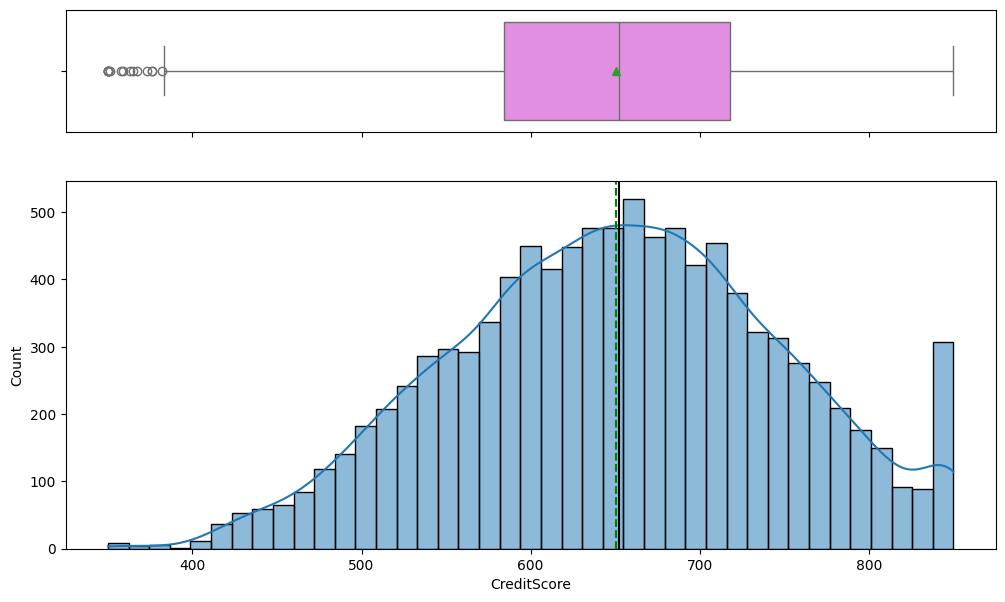

In [ ]:
# Plot a histogram and boxplot to examine distribution of the CreditScore continuous variable
histogram_boxplot(data, "CreditScore", kde=True)

**Observations**

* **CreditScore** appears to follow a slightly left-skewed distribution.
* Both the mean and median credit scores are around 650.
* There are a number of outliers with credit scores below the lower bound whisker value of the box plot.
  * These are potentially younger customers who have not had an opportunity to begin developing their credit score yet.
* There is a spike of at least 300 customers present in the far upper limit of the histogram, with a **CreditScore** value of approx. 850.
  * This upper limit value may represent the maximum credit score a customer can achieve.


####Geography

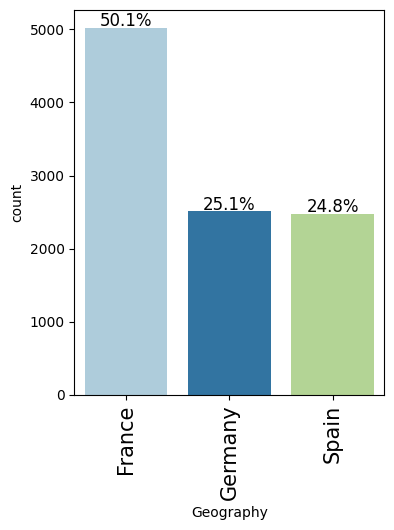

In [ ]:
# Generate a labeled bar plot on distribution of the Geography categorical variable
labeled_barplot(data, "Geography", perc=True)

**Observations**

* All customers in the data set reside in either France, Germany or Spain.
* Over half (50.1%) of customers in the data set reside in France.
* The remaining customers are split roughly equally between Germany (25.1%) and Spain (24.8%).

####Gender

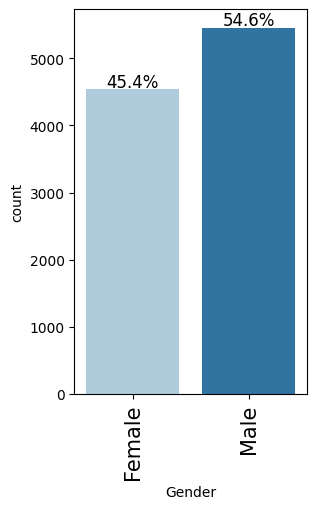

In [ ]:
# Generate a labeled bar plot on distribution of the Gender categorical variable
labeled_barplot(data, "Gender", perc=True)

**Observations**

* More than half (54.6%) of the data set is made up of Male customers.
* All customers are classified as either Male or Female only.

####Age

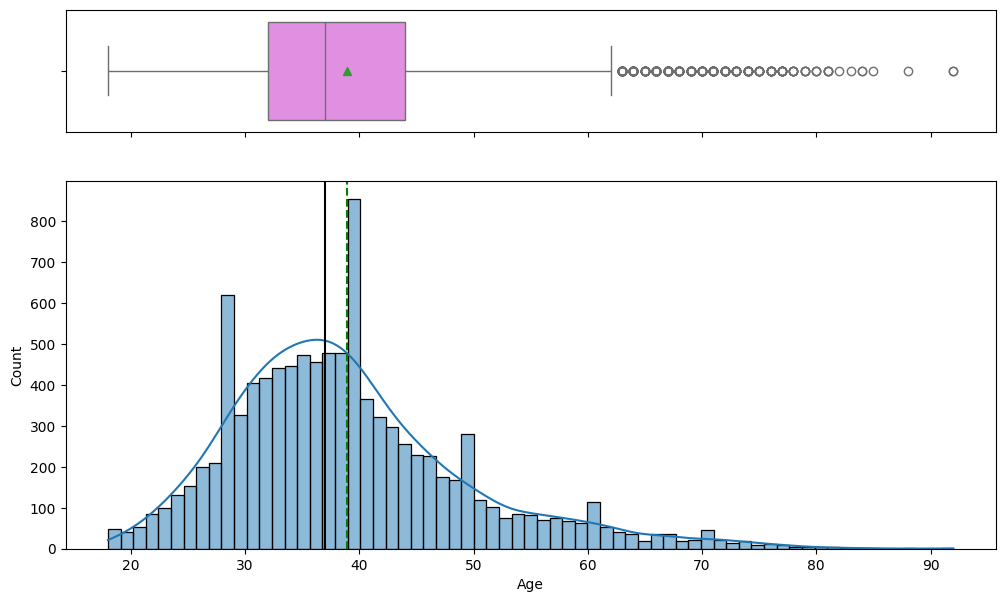

In [ ]:
# Plot a histogram and boxplot to examine distribution of the Age continuous variable
histogram_boxplot(data, "Age", kde=True)

**Observations**

* **Age** follows a rightskewed distribution, with the box plot displaying a tail of customers older than the upper bound whisker value of approx. 62 years old.
  * This suggests the bank services a number of older customers.
  * At least one customer is over the age of 90.
* The minimum **Age** of customers is 18 years old.

In [ ]:
# Print the mean and median age values of customers in the data set

print('Mean age: ' + str(data['Age'].mean()))
print('Median age: ' + str(data['Age'].median()))

Mean age: 38.9218
Median age: 37.0


* The mean **Age** is skewed almost 2 years older than the median **Age** by a smaller number of elderly customers in the data set

####Tenure

Note: While **Tenure** is a continuous integer variable, all records are assigned only one of 11 possible integer values.

In [ ]:
# Provide total number of unique values for the Tenure variable
data["Tenure"].nunique()

11

Based on the limited number of values assigned, the distribution of this variable will be examined using a bar plot rather than a histogram or box plot.

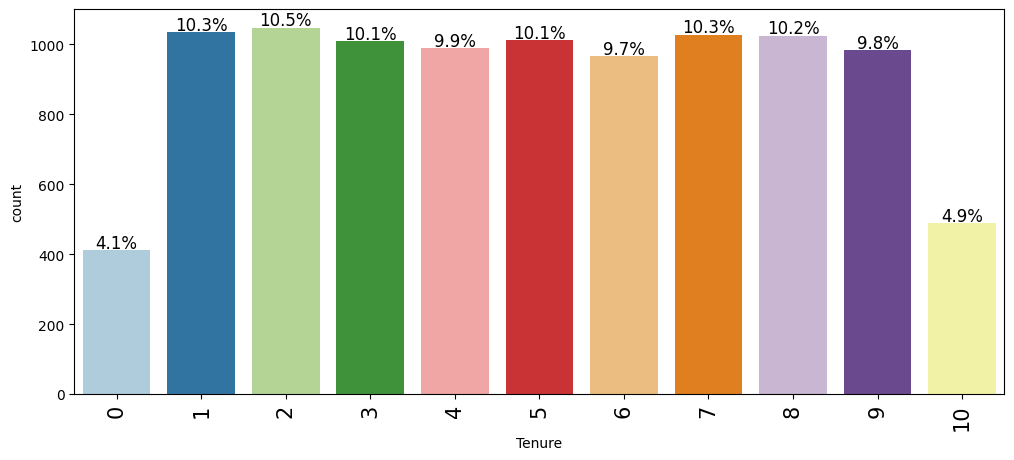

In [ ]:
# Generate a labeled bar plot on distribution of the Tenure continuous variable
labeled_barplot(data, "Tenure", perc=True)

**Observations**

* There is a fairly even spread of customers with between 1 and 9 years of **Tenure** with the bank.
  * There is no obvious drop off in customers between range of **Tenure**s with the bank.
* Only 4.9% of customers have reached 10 years of **Tenure** with the bank.
  * There may be some factor that causes customer churn to increase after 9 years of **Tenure**.
  * Alternatively, the bank may only have been operating for 10 years, so fewer customers will have had the opportunity to reach 10 years of **Tenure**.
* Only 4.1% of customers have less than 1 year of Tenure with the bank.
  * This may suggest a reduction in new customer acquisition by the bank in comparison to previous years.

####Balance

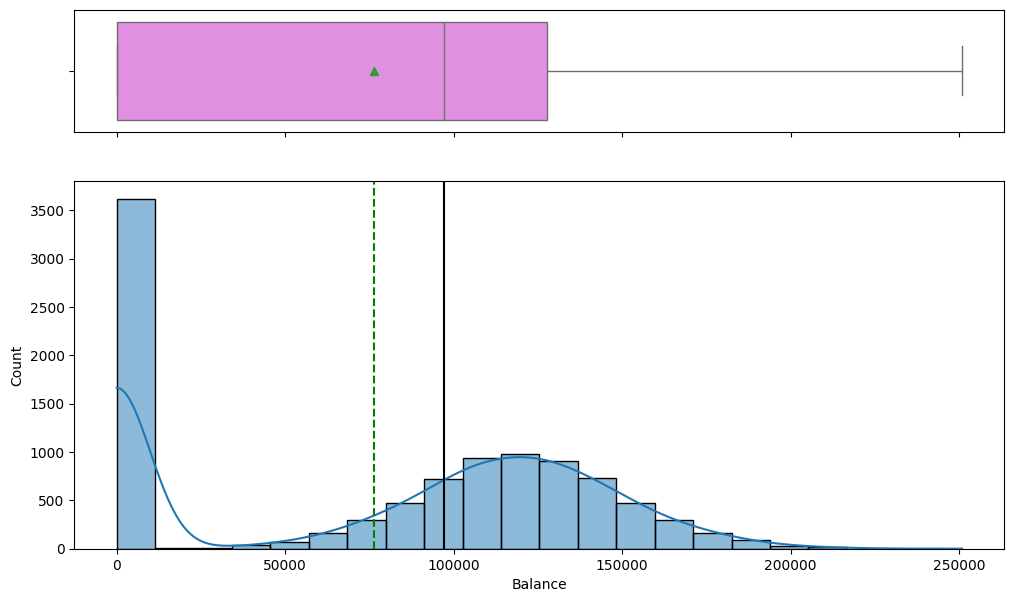

In [ ]:
# Plot a histogram and boxplot to examine distribution of the Balance continuous variable
histogram_boxplot(data, "Balance", kde=True)

**Observations**

* The **Balance** distribution is dominated by over 3,500 customers with an account **Balance** of zero or close to zero, as shown on the left hand side of the histogram.
  * These customers may only use bank products where maintaining a zero account balance is common, such as a credit card.
  * This variable may only record the balances of customers who maintain certain products with the bank, such as checking or saving accounts.
* For customers with an account balance, the balance values follow a normal distribution.

In [ ]:
# Print the mean and median Balance values of customers in the data set

print('Mean Balance: ' + str(round(data['Balance'].mean(), 2)))
print('Median Balance: ' + str(round(data['Balance'].median(), 2)))

Mean Balance: 76485.89
Median Balance: 97198.54


* The mean balance is skewed approx. 20,713 lower than the median balance due to the large number of customers with a zero or close to zero account balance.

####NumOfProducts

Note: While **NumOfProducts** is a continuous integer variable, all records are assigned only one of 4 possible integer values.

In [ ]:
# Provide total number of unique values for the NumOfProducts variable
data["NumOfProducts"].nunique()

4

Based on the limited number of values assigned, the distribution of this variable will be examined using a bar plot rather than a histogram or box plot.

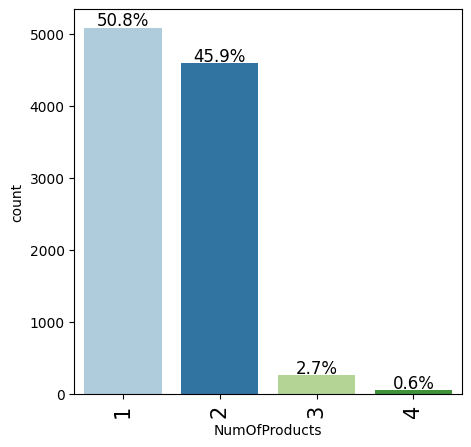

In [ ]:
# Generate a labeled bar plot on distribution of the NumOfProducts categorical variable
labeled_barplot(data, "NumOfProducts", perc=True)

**Observations**

* Over half (50.8%) of customers in the data set have only a single product with the bank.
* Only 3.3% of customers in the data set have more than 2 products with the bank.
* No customers have more than 4 products with the bank.

####HasCrCard

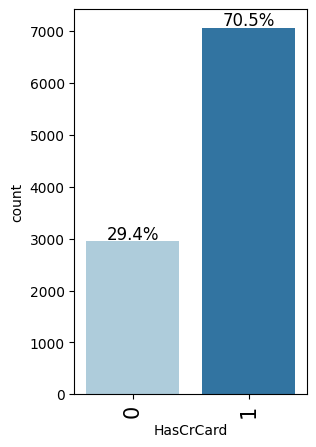

In [ ]:
# Generate a labeled bar plot on distribution of the HasCrCard categorical variable
labeled_barplot(data, "HasCrCard", perc=True)

**Observations**

* 70.5% of customers in the data set have a credit card with the bank.
  * Credit cards appear to be the most popular product for customers in the data set.

####IsActiveMember

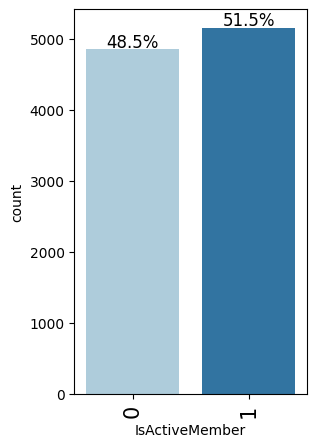

In [ ]:
# Generate a labeled bar plot on distribution of the IsActiveMember categorical variable
labeled_barplot(data, "IsActiveMember", perc=True)

**Observations**

* 51.5% of customers in the data set are considered Active by the bank.
  * Almost half of customers in the data set are inactive.

####EstimatedSalary

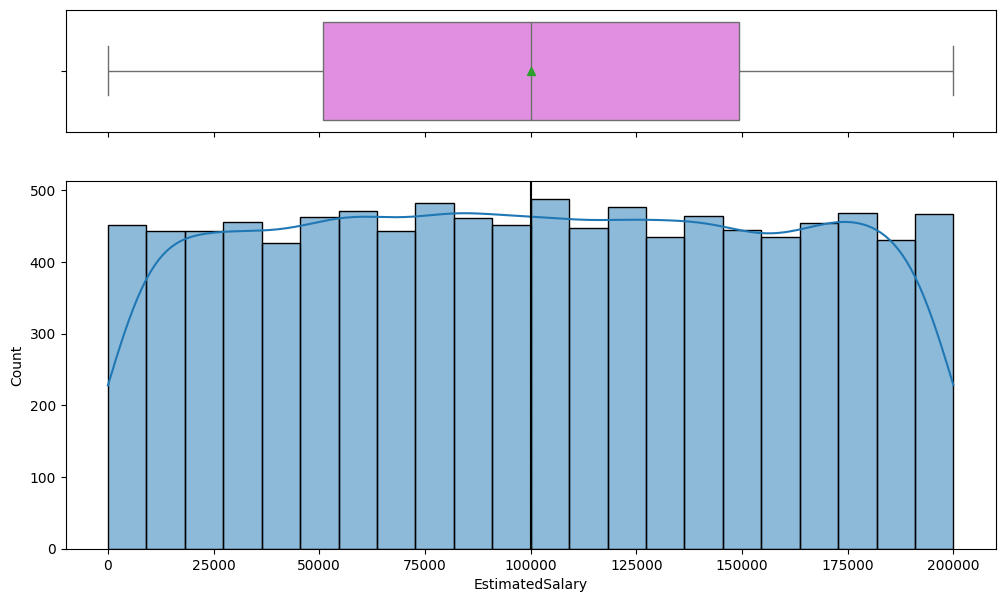

In [ ]:
# Plot a histogram and boxplot to examine distribution of the EstimatedSalary continuous variable
histogram_boxplot(data, "EstimatedSalary", kde=True)

**Observations**

* **EstimatedSalary** appears to follow a uniform distribution, with customers spread roughly evenly across all bins in the histogram.
* Both the mean and median **EstimatedSalary** is approx. 100,000.
* There are no outliers in the data set.

####Exited

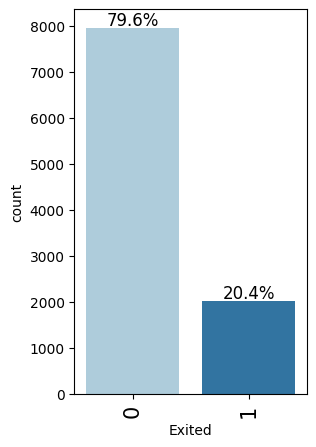

In [ ]:
# Generate a labeled bar plot on distribution of the Exited categorical variable
labeled_barplot(data, "Exited", perc=True)

**Observations**

* This is an inbalanced data set with regard to the **Exited** target variable.
  * This imbalance may impact the bias of any models trained using the data, as the model will encounter more records from the majority 0 class as part of the training process.
* 20.4% of customers in the data set went on to leave the bank.

### Bivariate Analysis

####Correlation check - continuous variables

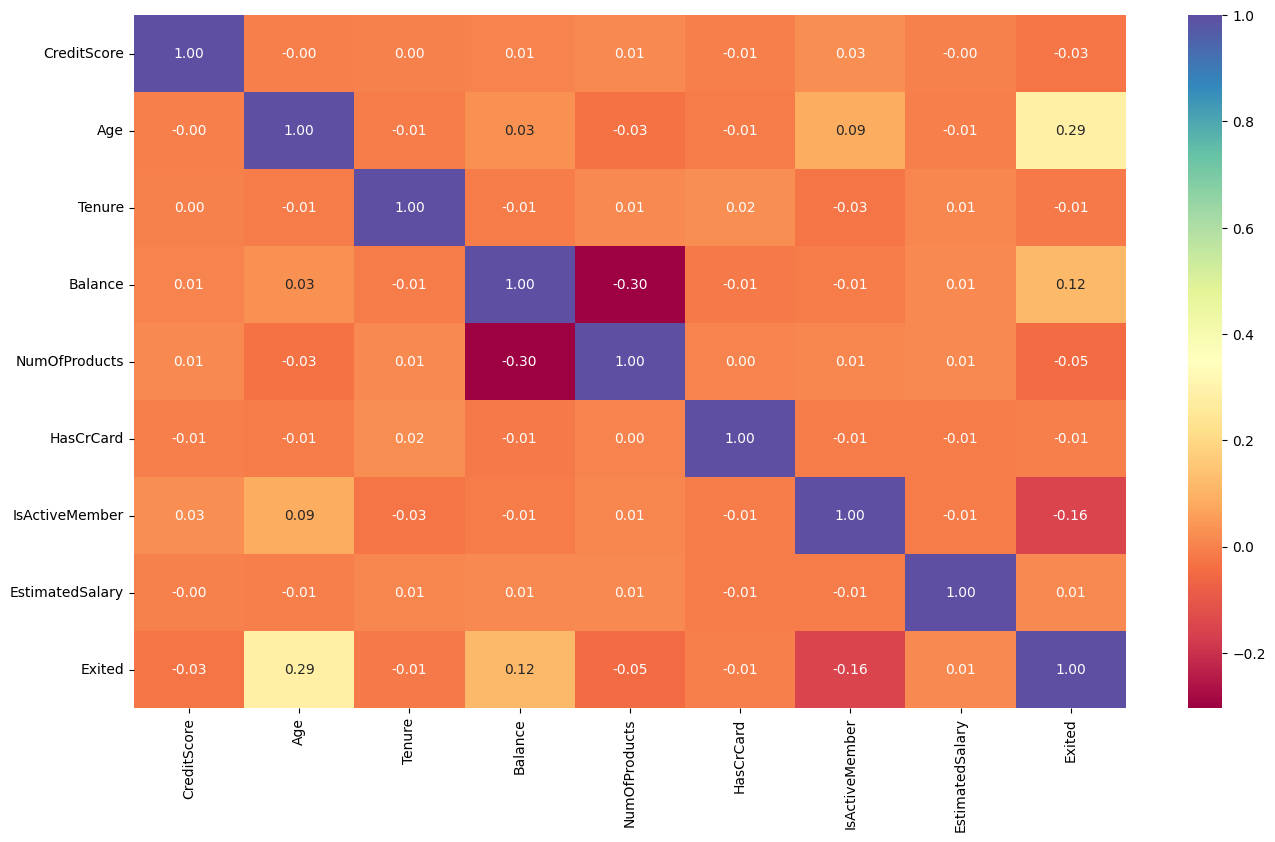

In [ ]:
# Generate a heat map of correlation between numeric values in the data set
plt.figure(figsize = (16,9))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Spectral");

**Observations**
* **Age** is positively correlated with the target **Exited** variable.
  * This suggests that as customers get older, they become more likely to leave the bank.
* **Balance** is negatively correlated with **NumOfProducts**.
  * This suggests customers with fewer products are less likely to maintain a balance with the Bank.
  * They may not have a product with the Bank where a large **Balance** would be consistently maintained, e.g. a credit card.
* **Balance** is slightly positively correlated with the target **Exited** variable.
  * This suggests that customers with higher balances are more likely to leave the bank, potentially for other insitutions that offer better services for large account balances.
* **IsActiveMember** is negatively correlated with the target **Exited** variable.
  * This suggests inactive customers are more likely to leave the bank than active customers.

All other attributes have absolute correlation values of less than 0.1, suggesting weaker correlation relationships between them.



####CreditScore vs Exited

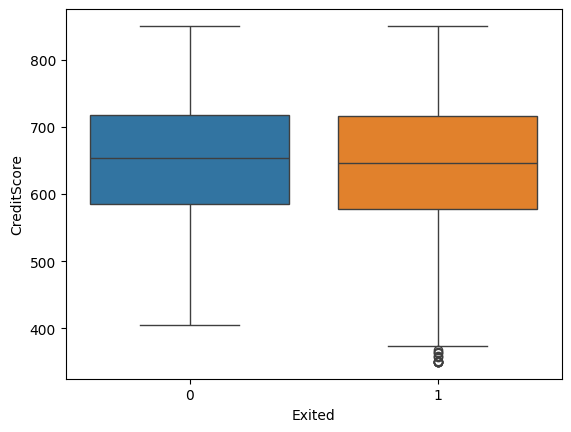

In [ ]:
# Output a box plot showing the distribution of customers who leave the bank, broken down by credit score
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', legend=False, data=data);

**Observations**

* All customers with a CreditScore of below 400 went on to leave the bank.

####Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


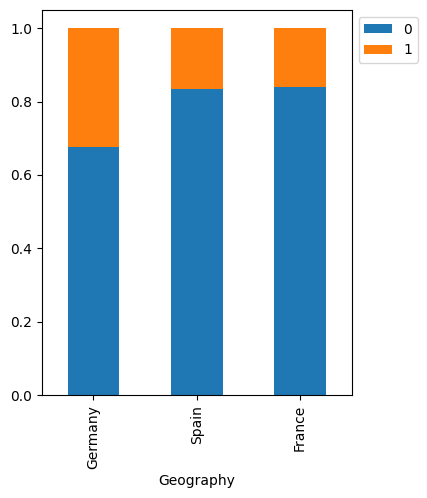

In [ ]:
# Output a stacked bar plot showing the distribution of customers who leave the bank, broken down by geographic location
stacked_barplot(data, "Geography", "Exited");

**Observations**

* Customers in Germany appeared roughly twice as likely to leave the bank as customers based in Spain or France.

####Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


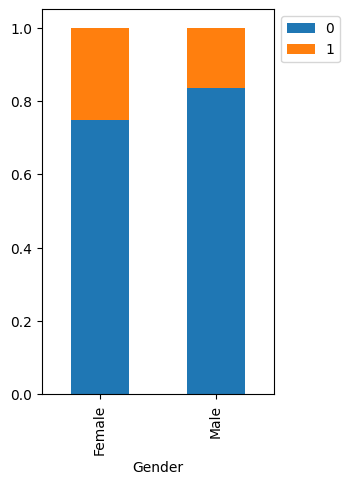

In [ ]:
# Output a stacked bar plot showing the distribution of customers who leave the bank, broken down by Gender
stacked_barplot(data, "Gender", "Exited");

**Observations**

* Female customers are more likely to leave the bank than male customers.

####Age vs Exited

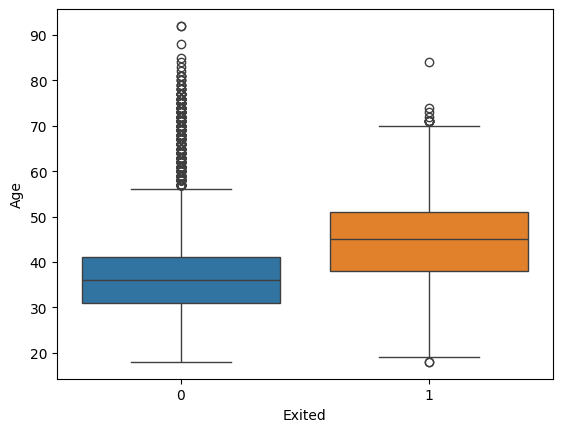

In [ ]:
# Output a box plot showing the distribution of customers who leave the bank, broken down by age
sns.boxplot(y='Age', x='Exited', hue='Exited', legend=False, data=data);

**Observations**

* 75% of customers who left the bank were more than 35 years old.
* The box plot distributions suggest the likelihood of a customer choosing to leave the bank increases with age.

####Tenure vs Exited

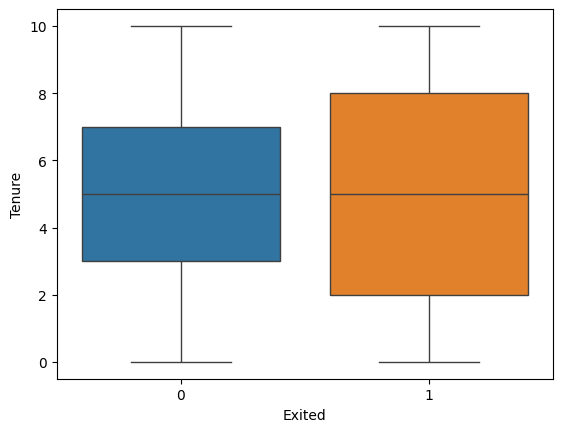

In [ ]:
# Output a box plot showing the distribution of customers who leave the bank, broken down by tenure
sns.boxplot(y='Tenure', x='Exited', hue='Exited', legend=False, data=data);

**Observations**

* There were customers at all **Tenure** periods who left the bank, including both new customers, and customers with up to 10 years of **Tenure**.
* This diagram does not demonstrate any significant impact of **Tenure** alone on the likelihood of a customer leaving the bank.

####Balance vs Exited

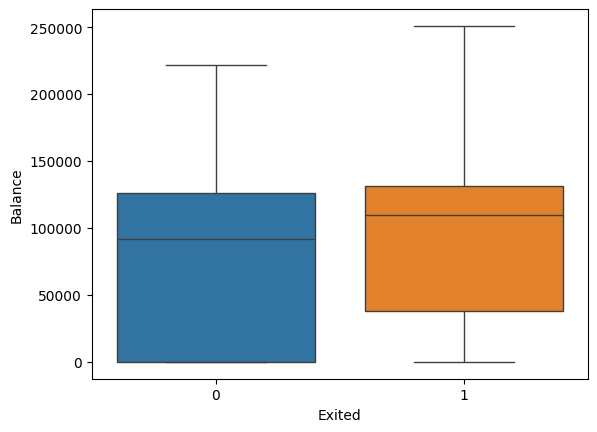

In [ ]:
# Output a box plot showing the distribution of customers who leave the bank, broken down by balance
sns.boxplot(y='Balance', x='Exited', hue='Exited', legend=False, data=data);

**Observations**

* 75% of customers who left the bank had an account balance of 35,000 or greater.
* All customers with a balance of greater than 225,000 left the bank.
  * This suggests the bank has difficulty retaining customers with higher account balances.
* Conversely, at least 25% of customers who remained with the bank had account balances of zero or close to zero.

####NumOfProducts vs Exited

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


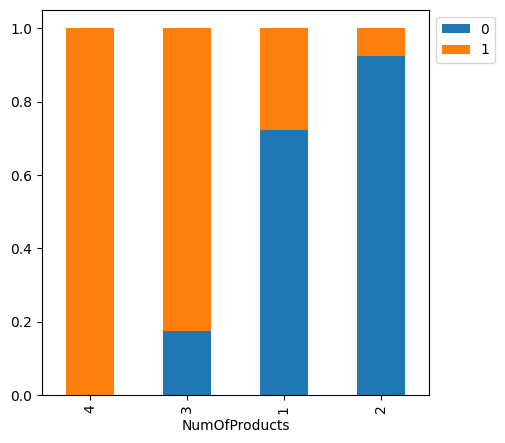

In [ ]:
# Output a stacked bar plot showing the distribution of customers who leave the bank, broken down by number of products with the bank
stacked_barplot(data, "NumOfProducts", "Exited");

**Observations**

* All customers who had 4 products with the bank left the bank.
* Over 80% of customers who had 3 products with the bank left the bank.
  * This suggests the bank struggles to retain customers who want to use multiple products.
* Customers with 2 products with the bank appeared least likely to leave.

####HasCrCard vs Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


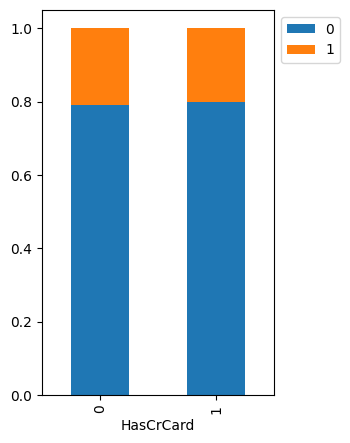

In [ ]:
# Output a stacked bar plot showing the distribution of customers who leave the bank, broken down by credit card status
stacked_barplot(data, "HasCrCard", "Exited");

**Observations**

* Customers with and without a credit card showed an almost identical likelihood of leaving the bank.
* This diagram does not demonstrate any significant impact of **HasCrCard** alone on the likelihood of a customer leaving the bank.

####IsActiveMember vs Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


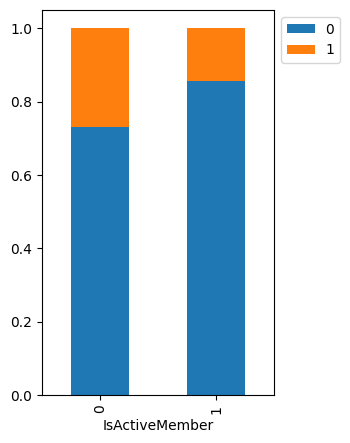

In [ ]:
# Output a stacked bar plot showing the distribution of customers who leave the bank, broken down by activity status
stacked_barplot(data, "IsActiveMember", "Exited");

**Observations**

* Inactive customers appeared almost twice as likely to leave the bank as customers classed as active by the bank.

####EstimatedSalary vs Exited

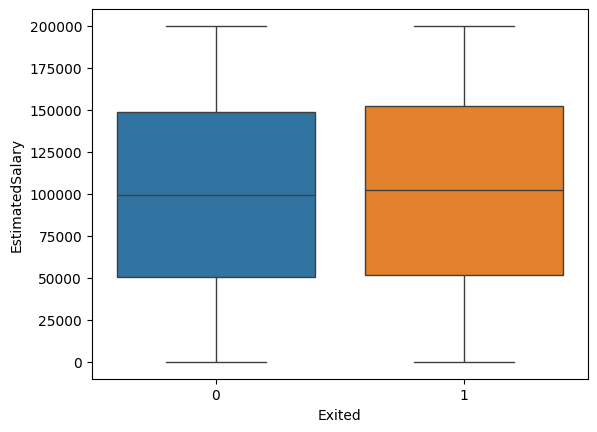

In [ ]:
# Output a box plot showing the distribution of customers who leave the bank, broken down by estimated salary
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', legend=False, data=data);

**Observations**

* There were customers at all **EstimatedSalary** values which went on to leave the bank.
* This diagram does not demonstrate any significant impact of **EstimatedSalary** alone on the likelihood of a customer leaving the bank.

## Data Preprocessing

### Step 1 - Encoding Dummy Variables

The data sets contain 2 object variables.

In [ ]:
data.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


**Geography** and **Gender** are object variables, which need to be encoded into numeric values to be recognized by the model.

As there is no inherent order or categorical relationship in either of these variables, one-hot encoding is an appropriate method for encoding these variables.

In [ ]:
# Convert all object variables into columns using one-hot encoding
data = pd.get_dummies(data,drop_first =True,dtype=int)
data.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2013,705,35,4,136496.12,2,1,0,116672.02,0,1,0,1
1066,731,52,10,0.00,1,1,1,24998.75,1,0,0,0
6334,608,35,6,0.00,2,1,1,143463.28,0,0,1,0
7701,677,29,3,86616.35,1,0,0,91903.90,1,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,1,0,0,0


After encoding, the **Geography** object variable has been split into two integer variables. The **Gender** object variable has also been replaced with an integer variable.

###Step 2 - Splitting data into test, validation and training data sets

Before splitting the data set, the **Exited** target variable needs to be separated from the predictor variables in the data set.

In [ ]:
# Creating a copy of the data for splitting purposes
data1 = data.copy()

# Splitting Exited dependent variable from predictor variables
X = data1.drop('Exited', axis=1)
y = data1['Exited']

The data set can then be split into training, validation and test data sets.

In [ ]:
# Initial split of the data set into a test data set and a temporary data set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Then split the temporary set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

# Output the shape of the training, validation and test data sets
print("Training data set shape: ",X_train.shape)
print("Validation data set shape: ",X_val.shape)
print("Test data set shape: ",X_test.shape)

Training data set shape:  (6000, 11)
Validation data set shape:  (2000, 11)
Test data set shape:  (2000, 11)


In order for the model training, validation and testing to be effective, each data set needs a similar class balance for the **Exited** target variable.


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in original data set")
print(y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 50)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 50)

Target value ratio in original data set
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
**************************************************
Target value ratio in y_train
Exited
0    0.796333
1    0.203667
Name: proportion, dtype: float64
**************************************************
Target value ratio in y_val
Exited
0    0.796
1    0.204
Name: proportion, dtype: float64
**************************************************
Target value ratio in y_test
Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64
**************************************************


All 3 new data sets include approx. 20% of their records belonging to customers that left the bank, the same as the original data set. The class balance of the **Exited** target variable in each data set is close to equal across all data sets.

### Step 3 - Data Normalization

Currently, all 3 data sets contain numeric variables that are measured on different scales. This could impact the bias of the model, as the variables with a larger scale may be weighted more heavily by the model.

In [ ]:
# Output a sample of rows from the training data set
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4472,660,23,6,166070.48,2,0,0,90494.72,1,0,0
4034,601,42,4,96763.89,1,1,1,199242.65,0,1,0
1454,521,34,7,70731.07,1,1,1,20243.97,0,1,0
9099,738,29,2,0.00,2,1,1,170421.13,0,0,1
2489,714,28,6,122724.37,1,1,1,67057.27,0,0,1


To avoid numeric variables with higher values influencing the data set, the **CreditScore**, **Age**, **Balance** and **EstimatedSalary** variables will be normalized using StandardScalar.

In [ ]:
# Define the columns to scale
cols_list = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the selected columns in each data set
X_train[cols_list] = sc.transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

# Output a sample of rows from the training data set
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4472,0.091585,-1.519034,6,1.447084,2,0,0,-0.173839,1,0,0
4034,-0.516304,0.279984,4,0.340252,1,1,1,1.713093,0,1,0
1454,-1.340560,-0.477497,7,-0.075495,1,1,1,-1.392789,0,1,0
9099,0.895235,-0.950923,2,-1.205076,2,1,1,1.212999,0,0,1
2489,0.647958,-1.045608,6,0.754843,1,1,1,-0.580512,0,0,1


The **CreditScore**, **Age**, **Balance** and **EstimatedSalary** variables numeric variables have now been normalized.

## Model Building

### Model Evaluation Criterion

**in this scenario, the model can make wrong predictions if:**

* It fails to identify a target customer who goes on leave the bank.
  * This would be a **False Negative** result (FN) or a **Type 2 error**.
* It incorrectly flags a customer who has no plans to leave the bank.
  * This would be a **False Positive** result (FP) or a **Type 1 error**.

**Which case is more important?**

* The Bank faces a potential loss of business if they fail to take action on a customer who is likely to leave (FN).
* The Bank may expend unnecessary resources if they target a customer who has no plans to leave the bank (FP).

As the incremental cost of targeting an inappropriate customer is likely to be minimal, while the loss of business caused by customer churn could be significant, the model will be evaulated on its ability to **minimize False Negative predictions**.

**How to minimize False Negatives?**

The **Recall** metric is appropriate for evaluating the ability of a model to maximize True Positive results, and minimize False Negative errors.

$Recall=\frac{TP}{TP+FN}$

In [ ]:
# Set the evaluation metric to be used to Recall
metrics = [tf.keras.metrics.Recall(name="Recall")]

###Model evaluation functions

The functions below have been provided to expedite the model evaulation process.

In [ ]:
# Define a function to generate a confusion matrix illustrating model performance
def make_confusion_matrix(actual_targets, predicted_targets):
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Initial model - Neural Network with SGD Optimizer

####Initial Model - Building

There are a variety of parameters to experiment with when building a Neural Network model.

To start with, a baseline model will be built with the following parameters:
* Using a hidden layer of 64 neurons with **relu** activation function.
* Using a second hidden layer of 32 neurons with **relu** activation function.
* Using an output layer with **sigmoid** activation function (required for models where a binary output prediction is generated).

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

# Make GPU ops as deterministic as possible to improve repeatability of model building
tf.config.experimental.enable_op_determinism()

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding an input layer followed by a hidden layer with 64 neurons using relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a second hidden layer with 32 neurons using tanh as activation function
model_0.add(Dense(32, activation='relu'))
# Adding an output layer using sigmoid as the activation function
model_0.add(Dense(1, activation = 'sigmoid'))

# Output a summary of the neural network layers, displaying the number of trainable parameters available in the model
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Once built, the baseline model will then be compiled using the following parameters:
* Using **Stochastic Gradient Descent (SGD)** as the learning optimizer.
* **Binary cross entropy** as loss function (required for models where a binary output prediction is generated).

In [ ]:
# Set learning optimizer to SGD
optimizer = keras.optimizers.SGD()

# Compile the model with the selected learning optimizer and performance metrics
model_0.compile(loss="BinaryCrossentropy", optimizer=optimizer, metrics=metrics)

The compiled model is then trained on the training data set, and its performance is evaluated using the validation data set. For consistency, all models will be run using the following parameters:
* A batch size of **32** records per iteration.
* A training window of **50 epochs**.


In [ ]:
# Setting a constant for batch size and epochs to be used in model training
batch_size = 32
epochs = 50

In [ ]:
# Record model training start time
start = time.time()

# Training model_0 and validating performance
history_0 = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

#Record model training end time
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.1730 - loss: 0.5737 - val_Recall: 0.0025 - val_loss: 0.4817
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.0064 - loss: 0.4750 - val_Recall: 0.0270 - val_loss: 0.4555
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0355 - loss: 0.4527 - val_Recall: 0.0637 - val_loss: 0.4418
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0887 - loss: 0.4413 - val_Recall: 0.0956 - val_loss: 0.4347
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.1444 - loss: 0.4353 - val_Recall: 0.1348 - val_loss: 0.4306
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.1820 - loss: 0.4319 - val_Recall: 0.1471 - val_loss: 0.4281
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.1947 - loss: 0.4296 - val_Recall: 0.1618 - val_loss: 0.4263
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.2066 - loss: 0.4278 - val_Recall: 0.1691 - val_loss: 0.4248
Epoch 9/

In [ ]:
# Output time taken to train the model
model_0_time = end - start
print("Time taken to train model:",round((end-start),2),"seconds")

Time taken to train model: 31.53 seconds


####Initial Model - Evaluation

Once the initial model has been trained, the performance of the model over the training process can be plotted, to evaluate how model performance improves with each training epoch.

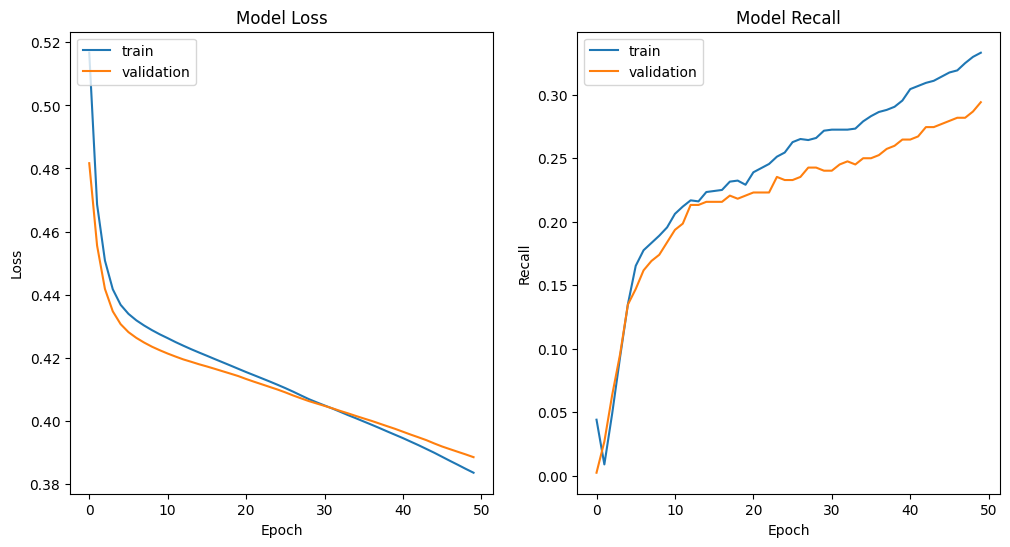

In [ ]:
# Plot model loss and model recall performance over epochs for training and validation data sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_0.history['Recall'])
plt.plot(history_0.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

**Observations - Model Loss**
* Model Loss drops steeply for the first 5 epochs, before declining more gradually to approx 0.39 for both data sets by the 50th epoch.
* The gradient of decline in Model Loss remained consistent from the 5th to the 50th epoch.
  * Increasing the number of training epochs could permit the model to reduce Model Loss further.
* Model Loss for the training and validation data sets remained roughly consistent across all epochs.
  * The rate of Model Loss reduction began to diverge slightly for the training and validation data sets by the 45th epoch.  

**Observations - Model Recall**
* Recall increased at a similar rate for the model on both the training and validation datasets for the first ~12 epochs, reaching a Recall value of 0.21.
* From the ~12th epoch onwards, Recall performance against the training data set began to increase more rapidly than for the validation data set.
  * This suggests that some overfitting is beginning to occur in later epochs.
* By the 50th epoch, the model is achieving a Recall of approx. 0.34 for the training data set, and approx. 0.29 for the validation data set.

####Initial Model - Confusion Matrix

Following training, the model can be used to make predictions against the training and validation data sets.

In [ ]:
# Using the model to predict target variable for training and validation data sets
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


The model predictions can be summarized in a confusion matrix.

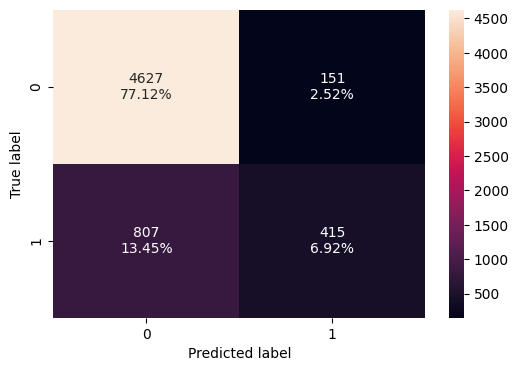

In [ ]:
# Plot confusion matrix for model performance against training data set
make_confusion_matrix(y_train, y_train_pred)

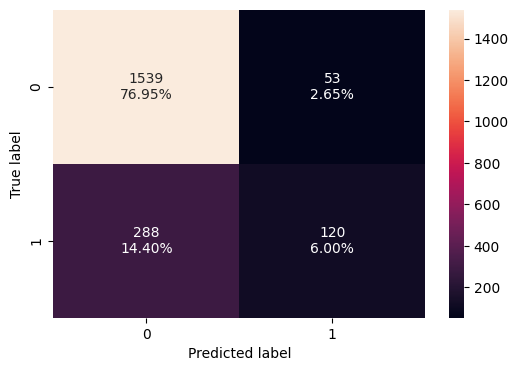

In [ ]:
# Plot confusion matrix for model performance against validation data set
make_confusion_matrix(y_val, y_val_pred)

**Observations - Confusion Matrix**
* After training the model for 50 epochs, the trained model incorrectly predicted 288 False Negatives on the validation data set, but only 53 False Positives.
* The model only predicted 29% of the **Exited** class 1 customers correctly.  
  * This suggests the model is biased towards predicting that customers will not leave the bank.
  * This is the majority class 0 in the **Exited** target class for prediction.
  * As the target variable is not balanced, the model may be influenced by the majority class to avoid predicting that customers will leave the bank.

####Initial Model - Classification Report

The performance metrics of the trained model with regard to both class 0 and class 1 (Exited) customers in the data sets can be illustrated using a classification report.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against training data
model0_cr_train = classification_report(y_train, y_train_pred)
print(model0_cr_train)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      4778
           1       0.73      0.34      0.46      1222

    accuracy                           0.84      6000
   macro avg       0.79      0.65      0.69      6000
weighted avg       0.83      0.84      0.82      6000



In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against validation data
model0_cr_val = classification_report(y_val, y_val_pred)
print(model0_cr_val)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1592
           1       0.69      0.29      0.41       408

    accuracy                           0.83      2000
   macro avg       0.77      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000



**Observations - Classification Report**
* While the model achieved a Recall score of 0.97 with respect to class 0 customers in the validation data set, it only achieved a Recall of 0.29 when predicting class 1 customers.
* There are similar differences in performance when it comes to Precision and F1 score performance metrics.
    * This suggests the model is biased towards predicting that customers will not leave the bank.

####Initial Model - Observations

* The initial model is not effective in predicting whether a customer will go on to leave the bank.
* The model achieved a Recall of only 0.29 on the validation data set with regard to customers who left the bank.
* The initial model appears biased towards the majority class of customers who remained with the bank.
* Further adjustment of model parameters and composition of the training data set should be considered to improve model Recall performance.

In [ ]:
# Create a dataframe to store summary details of each model
results = pd.DataFrame(columns=["# hidden layers","# neurons","activation functions","# epochs","batch size","optimizer","dropout","sampling","train loss","val loss","train recall","val recall","time (secs)"])

In [ ]:
# Add details of initial model to results dataframe and output the results
results.loc[0] = [2,[64,32,1],["relu","relu","sigmoid"],50,32,"SGD","-","-",history_0.history["loss"][-1],history_0.history["val_loss"][-1],history_0.history["Recall"][-1],history_0.history["val_Recall"][-1],round(model_0_time,2)]
results

,# hidden layers,# neurons,activation functions,# epochs,batch size,optimizer,dropout,sampling,train loss,val loss,train recall,val recall,time (secs)
0,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,-,0.383497,0.388428,0.333061,0.294118,31.53


## Model Performance Improvement

###Model 1 - Neural Network with Adam Optimizer

####Model 1 - Building

Learning rate and momentum are two important parameters to consider when building a Neural Network model. These can be influenced based on the learning optimizer selected when compiling the model.

The **SGD** learning optimizer employed in the initial model uses a set learning rate during all training iterations.

An alternative learning optimizer such as **Adam** can be employed to adjust the learning rate dynamically during training.

To test the impact of adjusting the learning rate during training, a new model will be built with an identical architecture to the initial model, and the **Adam** learning optimizer applied.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources
backend.clear_session()

In [ ]:
#Initializing the neural network with an identical architecture to the initial model
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid'))

# Output a summary of the neural network layers, displaying the number of trainable parameters available in the model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

The new model will be compiled with one difference to the initial model:
* Using **Adam** as the learning optimizer.

All other parameters will remain the same.

In [ ]:
# Set learning optimizer to Adam
optimizer = keras.optimizers.Adam()

# Compile the model with the selected learning optimizer and performance metrics
model_1.compile(loss="BinaryCrossentropy", optimizer=optimizer, metrics=metrics)

The compiled model with the **Adam** learning optimizer is then trained on the training data set, and its performance is evaluated using the validation data set.

In [ ]:
# Record model training start time
start = time.time()

# Training model_1 and validating performance
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

#Record model training end time
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.1743 - loss: 0.5066 - val_Recall: 0.1446 - val_loss: 0.4297
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.2065 - loss: 0.4295 - val_Recall: 0.1642 - val_loss: 0.4198
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.2430 - loss: 0.4185 - val_Recall: 0.1838 - val_loss: 0.4125
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.2763 - loss: 0.4091 - val_Recall: 0.2157 - val_loss: 0.4048
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3051 - loss: 0.3986 - val_Recall: 0.2475 - val_loss: 0.3964
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.3300 - loss: 0.3874 - val_Recall: 0.2770 - val_loss: 0.3871
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3473 - loss: 0.3764 - val_Recall: 0.2941 - val_loss: 0.3797
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.3843 - loss: 0.3669 - val_Recall: 0.3137 - val_loss: 0.3745
Epoch 9/

In [ ]:
# Output time taken to train the model
model_1_time = end - start
print("Time taken to train model:",round((end-start),2),"seconds")

Time taken to train model: 34.6 seconds


####Model 1 - Evaluation

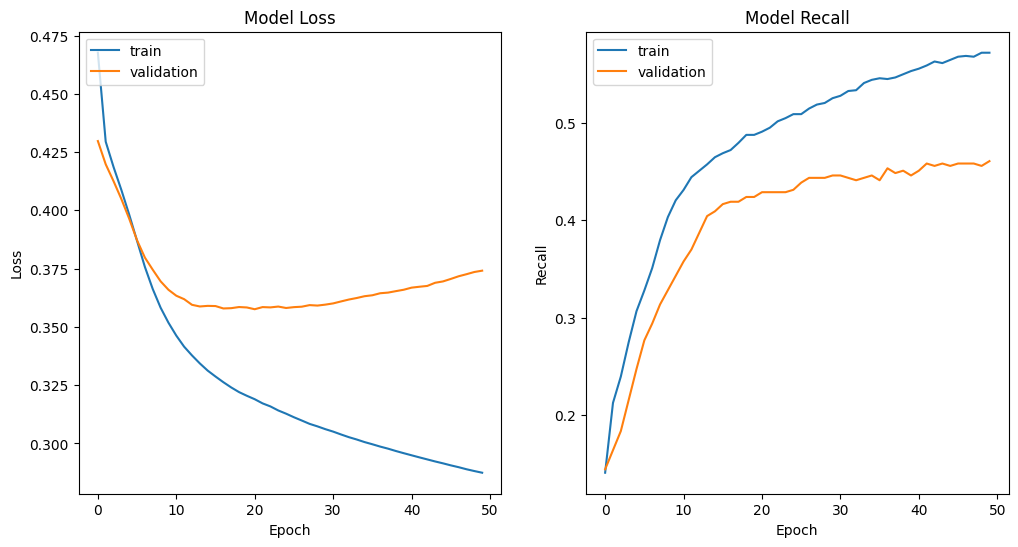

In [ ]:
# Plot model loss and model recall performance over epochs for training and validation data sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['Recall'])
plt.plot(history_1.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

**Observations - Model Loss**
* Model Loss against both training and validation data sets drops steeply together for the first ~5 epochs to approx. 0.385 before diverging.
* Model Loss against the training data set continues to drop steeply until the 10th epoch, before dropping at a reduced rate until reaching approx. 0.29 by the 50th epoch.
* Conversely, the reduction in Model Loss flattens out by the ~15th epoch against the validation data set, before beginning to increase slightly for the remaining training, reaching approx. 0.375 by the 50th epoch.
  * This is still lower than the Model Loss of 0.39 achieved by the initial model on both the training and validation data sets, suggesting better model performance when **Adam** learning optimizer is employed.
* Model Loss was lower for the training data set than for the validation data set from the ~5th epoch onwards.
  * This suggests the model quickly began overfitting the training data set after just a few training iterations.  

**Observations - Model Recall**
* Recall increased more rapidly for the training data set than for the validation data set from the first epoch onwards.
    * This suggests the model was overfitting the training data set throughout training.  
* From the ~12th epoch onwards, the rate of increase in Recall began to reduce for both data sets.
* By the 50th epoch, the model achieved a Recall of approx. 0.58 for the training data set, and approx. 0.46 for the validation data set.
  * This is higher than the Recall value of 0.29 achieved by the initial model on the validation data set, suggesting better model performance when **Adam**  learning optimizer is employed.

####Model 1 - Confusion Matrix

Following training, the model can be used to make predictions against the training and validation data sets.

In [ ]:
# Using the model to predict target variable for training and validation data sets
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


The model predictions can be summarized in a confusion matrix.

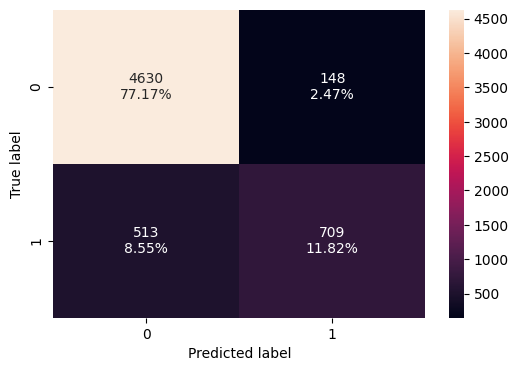

In [ ]:
# Plot confusion matrix for model performance against training data set
make_confusion_matrix(y_train, y_train_pred)

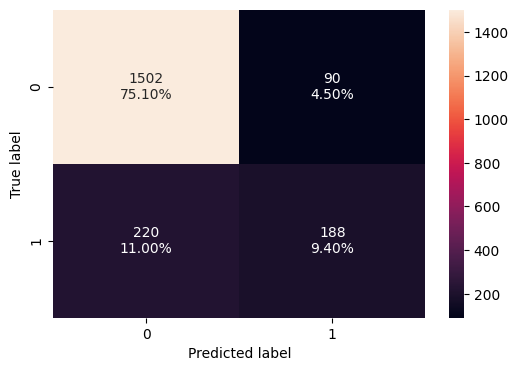

In [ ]:
# Plot confusion matrix for model performance against validation data set
make_confusion_matrix(y_val, y_val_pred)

**Observations - Confusion Matrix**
* After training the model for 50 epochs, the trained model incorrectly predicted 220 False Negatives on the validation data set, and 90 False Positives.
* The model predicted 46% of the **Exited** class 1 customers correctly.  
  * This is higher than the 29% of class 1 customers predicted correctly by the initial model, but still less than half of the class 1 data set.
  * This suggests the model is still biased towards predicting that customers will not leave the bank, but to a lesser extent than the initial model.

####Model 1 - Classification Report

The performance metrics of the trained model with regard to both class 0 and class 1 (Exited) customers in the data sets can be illustrated using a classification report.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against training data
model1_cr_train = classification_report(y_train, y_train_pred)
print(model1_cr_train)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4778
           1       0.83      0.58      0.68      1222

    accuracy                           0.89      6000
   macro avg       0.86      0.77      0.81      6000
weighted avg       0.89      0.89      0.88      6000



In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against validation data
model1_cr_val = classification_report(y_val, y_val_pred)
print(model1_cr_val)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1592
           1       0.68      0.46      0.55       408

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.84      0.83      2000



**Observations - Classification Report**
* Model 1 achieved a slightly lower Recall score of 0.94 with respect to class 0 customers in the validation data set, and an improved Recall of 0.46 with respect to class 1 customers.
  * This is an improvement on the Recall score of 0.29 achieved by the initial model when predicting class 1 customers in the validation data set.
  * This suggests the model is still slightly biased towards predicting that customers will not leave the bank.

####Model 1 - Observations

* Model 1 with **Adam** learning optimizer is more effective at predicting when a customer will leave the bank than the initial model compiled with **SGD** learning optimizer.
* The training graphs show a variance in model performance between the training and validation data sets, suggesting the model is overfitting the training data.
* Model 1 still appears to be somewhat biased towards the majority class of customers who remained with the bank.
* The model could be improved further by addressing overfitting of the training data.

In [ ]:
# Add details of model 1 to results dataframe and output the results
results.loc[1] = [2,[64,32,1],["relu","relu","sigmoid"],50,32,"Adam","-","-",history_1.history["loss"][-1],history_1.history["val_loss"][-1],history_1.history["Recall"][-1],history_1.history["val_Recall"][-1],round(model_1_time,2)]
results

,# hidden layers,# neurons,activation functions,# epochs,batch size,optimizer,dropout,sampling,train loss,val loss,train recall,val recall,time (secs)
0,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,-,0.383497,0.388428,0.333061,0.294118,31.53
1,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,-,0.287417,0.374106,0.572013,0.460784,34.60


### Model 2 - Neural Network with Adam Optimizer and Dropout

####Model 2 - Building

Model 1 trained with **Adam** learning optimizer showed an improvement in Recall performance, but was also overfitting the training data set.

One technique for reducing overfitting of a neural network while improving accuracy is to introduce **Dropout** to the neural network architecture.

This will randomly deactivate some neurons during training iterations, which will help to reduce overfitting and prevent neurons from co-adapting during the training process.

To test the impact of **Dropout**, a new model will be built with **Dropout** applied to the first hidden layer of the neural network, and the **Adam** learning optimizer applied.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources
backend.clear_session()

In [ ]:
# Initializing the neural network
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a dropout layer, which will randomly drop half the neurons in each training iteration
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

# Output a summary of the neural network layers, displaying the number of trainable parameters available in the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

The new model will be compiled with identical parameters to Model 1.

In [ ]:
# Set learning optimizer to Adam
optimizer = keras.optimizers.Adam()

# Compile the model with the selected learning optimizer and performance metrics
model_2.compile(loss="BinaryCrossentropy", optimizer=optimizer, metrics=metrics)

The compiled model with **Dropout** applied to the first hidden layer is then trained on the training data set, and its performance is evaluated using the validation data set.

In [ ]:
# Record model training start time
start = time.time()

# Training model_0 and validating performance
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

#Record model training end time
end=time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Recall: 0.2380 - loss: 0.5264 - val_Recall: 0.1765 - val_loss: 0.4300
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1340 - loss: 0.4610 - val_Recall: 0.2230 - val_loss: 0.4232
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1314 - loss: 0.4478 - val_Recall: 0.2426 - val_loss: 0.4195
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1664 - loss: 0.4395 - val_Recall: 0.2402 - val_loss: 0.4155
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1643 - loss: 0.4350 - val_Recall: 0.2745 - val_loss: 0.4145
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.2061 - loss: 0.4337 - val_Recall: 0.2843 - val_loss: 0.4122
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.2032 - loss: 0.4342 - val_Recall: 0.2525 - val_loss: 0.4087
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.2341 - loss: 0.4229 - val_Recall: 0.2966 - val_loss: 0.4076
Epoch 9/

In [ ]:
# Output time taken to train the model
model_2_time = end - start
print("Time taken to train model:",round((end-start),2),"seconds")

Time taken to train model: 36.16 seconds


####Model 2 - Evaluation

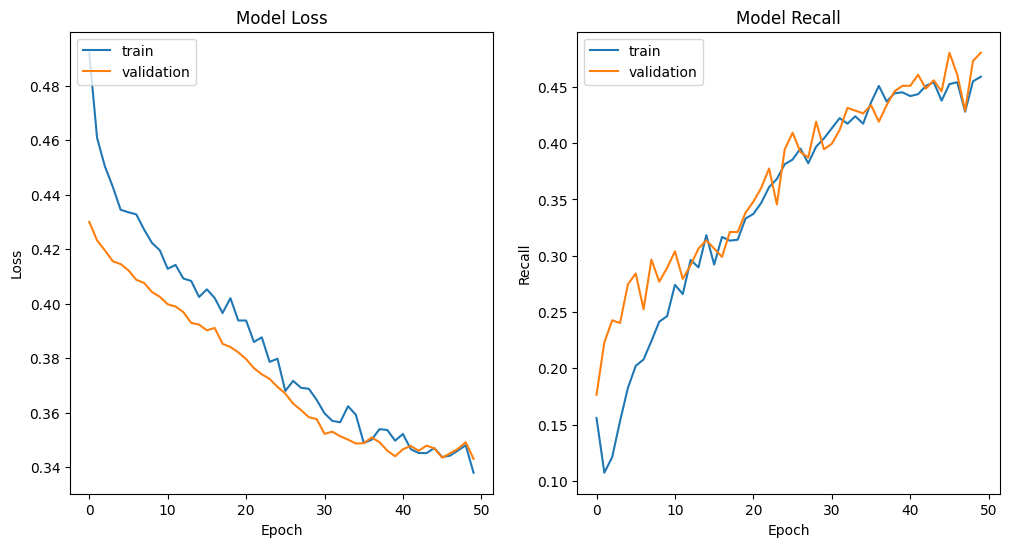

In [ ]:
# Plot model loss and model recall performance over epochs for training and validation data sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['Recall'])
plt.plot(history_2.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

**Observations - Model Loss**
* Model Loss against both training and validation data sets reduces at a similar rate, and converges by the 50th epoch.
  * This suggests that applying **Dropout** has addressed the model overfitting the training data.
* The model achieves a Model Loss of approx. 0.345 for bth the training and validation data sets by the 50th epoch.
  * This is lower than the Model Loss of approx. 0.375 achieved by Model 1 on the validation data set, suggesting that **Dropout** is improving model performance.
* Model Loss does not appear to reduce significantly for either data set after the 40th epoch.
  * This suggests that there would be limited further improvement in model performance if further training epochs were performed.

**Observations - Model Recall**
* Recall increased at a similar rate for both training and validation data sets across all training epochs, suggesting that overfitting is no longer occurring.
* The model achieved a Recall of approx. 0.45 for both data sets by the 50th epoch, higher than the 0.425 achieved against the validation data set for Model 1.
  * This suggests applying **Dropout** is improving model performance.
* The rate of increase in Recall is not smooth, with drops in Recall observed at different epochs for the training and validation data sets.
  * This could be caused the random **Dropout** of critical neurons on specific training iterations leading to a reduction in Recall for that iteration.

####Model 2 - Confusion Matrix

Following training, the model can be used to make predictions against the training and validation data sets.

In [ ]:
# Using the model to predict target variable for training and validation data sets
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


The model predictions can be summarized in a confusion matrix.

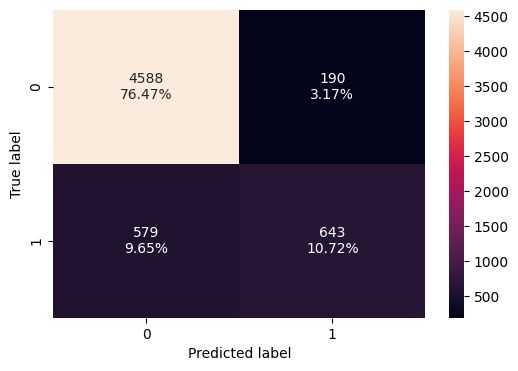

In [ ]:
# Plot confusion matrix for model performance against training data set
make_confusion_matrix(y_train, y_train_pred)

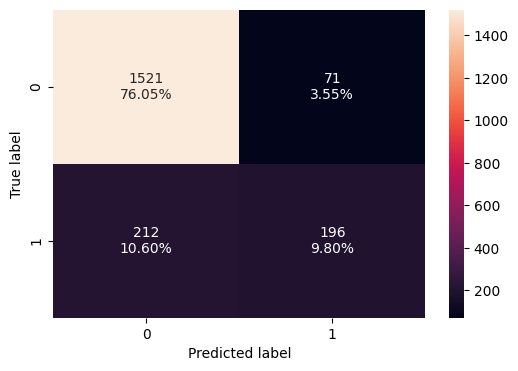

In [ ]:
# Plot confusion matrix for model performance against validation data set
make_confusion_matrix(y_val, y_val_pred)

**Observations - Confusion Matrix**
* After training the model for 50 epochs, the trained model predicted 212 False Negatives on the validation data set, and 71 False Positives.
* The model predicted 48% of the **Exited** class 1 customers correctly.  
  * This is similar to the 46% of class 1 customers predicted corretly by Model 1.

####Model 2 - Classification Report

The performance metrics of the trained model with regard to both class 0 and class 1 (Exited) customers in the data sets can be illustrated using a classification report.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against training data
model2_cr_train = classification_report(y_train, y_train_pred)
print(model2_cr_train)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4778
           1       0.77      0.53      0.63      1222

    accuracy                           0.87      6000
   macro avg       0.83      0.74      0.77      6000
weighted avg       0.86      0.87      0.86      6000



In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against validation data
model2_cr_val = classification_report(y_val, y_val_pred)
print(model2_cr_val)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1592
           1       0.73      0.48      0.58       408

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



**Observations - Classification Report**
* Model 2 achieved an improved Recall of 0.96 with respect to class 0 customers in the validation data set, and a Recall of 0.48 with respect to class 1 customers.
  * This suggests that **Dropout** does not significantly improve model Recall performance with regard to class 1 customers, but does help address overfitting of training data.
  * Model 2 is still slightly biased towards predicting that customers will not leave the bank.

####Model 2 - Observations

* Model 2 with **Adam** learning optimizer and **Dropout** applied achieves a similar level of performance to Model 1 without **Dropout** applied.
* However, Model 2 does not show evidence of overfitting the training data.
* Like the previous models, Model 2 demonstrates a bias towards the majority class of customers who remained with the bank.
* Balancing the training data set using a statistical technique could improve model performance further.

In [ ]:
# Add details of model 2 to results dataframe and output the results
results.loc[2] = [2,[64,32,1],["relu","relu","sigmoid"],50,32,"Adam","0.5","-",history_2.history["loss"][-1],history_2.history["val_loss"][-1],history_2.history["Recall"][-1],history_2.history["val_Recall"][-1],round(model_2_time,2)]
results

,# hidden layers,# neurons,activation functions,# epochs,batch size,optimizer,dropout,sampling,train loss,val loss,train recall,val recall,time (secs)
0,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,-,0.383497,0.388428,0.333061,0.294118,31.53
1,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,-,0.287417,0.374106,0.572013,0.460784,34.60
2,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,0.5,-,0.337905,0.343005,0.459083,0.480392,36.16


### Model 3 - Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

####Model 3 - Building

All models built so far have demonstrated a bias towards the majority class 0 of **Exited** customers in the data set. This is caused because the target variable distribution in the training data set is unbalanced.

To address this bias, statistical techniques can be applied to balance the distribution of target variable classes in the training data set prior to training the model.

One technique for balancing the training data set would be to apply **SMOTE** (Synthetic Minority Oversampling Technique) to the training data set. This technique generates new synthetic data points for the minority target variable class to balance the training data set.

Using a balanced data set to train the model may improve model performance by reducing the development of bias towards any one target variable class.

To test the impact of applying **SMOTE**, a new balanced training data set will be prepared.

In [ ]:
# Output count of target class records in unmodified training data set
print("Before Oversampling, counts of label '1' in training data: {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0' in training data: {} \n".format(sum(y_train == 0)))

# Apply SMOTE to the training data set
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Output count of target class records in oversampled training data set
print("After Oversampling, counts of label '1' in training data: {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0' in training data: {} \n".format(sum(y_train_over == 0)))

# Output shape of oversampled training data sets
print("After Oversampling, the shape of train_X in training data: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y in training data: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '1' in training data: 1222
Before Oversampling, counts of label '0' in training data: 4778 

After Oversampling, counts of label '1' in training data: 4778
After Oversampling, counts of label '0' in training data: 4778 

After Oversampling, the shape of train_X in training data: (9556, 11)
After Oversampling, the shape of train_y in training data: (9556,) 



Once oversampling is performed, the number of target class 1 **Exited** customers in the training data set has increased from 1,222 to 4,778.

This creates a training data set with equal number of class 1 and class 0 customers.

To test the impact of this, a neural network model with identical parameters to the initial model will be created.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources
backend.clear_session()

In [ ]:
# Initializing the neural network with identical parameters to the initial model
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

# Output a summary of the neural network layers, displaying the number of trainable parameters available in the model
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set learning optimizer to SGD
optimizer = keras.optimizers.SGD()

# Compile the model with the selected learning optimizer and performance metrics
model_3.compile(loss="BinaryCrossentropy", optimizer=optimizer, metrics=metrics)

The compiled model is then trained on the oversampled training data set, and its performance is evaluated using the validation data set.

In [ ]:
# Record model training start time
start = time.time()

# Training model_0 and validating performance
history_3 = model_3.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

#Record model training end time
end=time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.4596 - loss: 0.6720 - val_Recall: 0.6740 - val_loss: 0.6190
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6781 - loss: 0.6039 - val_Recall: 0.6667 - val_loss: 0.5754
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6966 - loss: 0.5726 - val_Recall: 0.6618 - val_loss: 0.5513
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7062 - loss: 0.5562 - val_Recall: 0.6667 - val_loss: 0.5368
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7182 - loss: 0.5461 - val_Recall: 0.6691 - val_loss: 0.5312
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7228 - loss: 0.5395 - val_Recall: 0.6642 - val_loss: 0.5269
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7280 - loss: 0.5345 - val_Recall: 0.6618 - val_loss: 0.5244
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7345 - loss: 0.5301 - val_Recall: 0.6740 - val_loss: 0.5235
Epoch 9/

In [ ]:
# Output time taken to train the model
model_3_time = end - start
print("Time taken to train model:",round((end-start),2),"seconds")

Time taken to train model: 53.86 seconds


####Model 3 - Evaluation

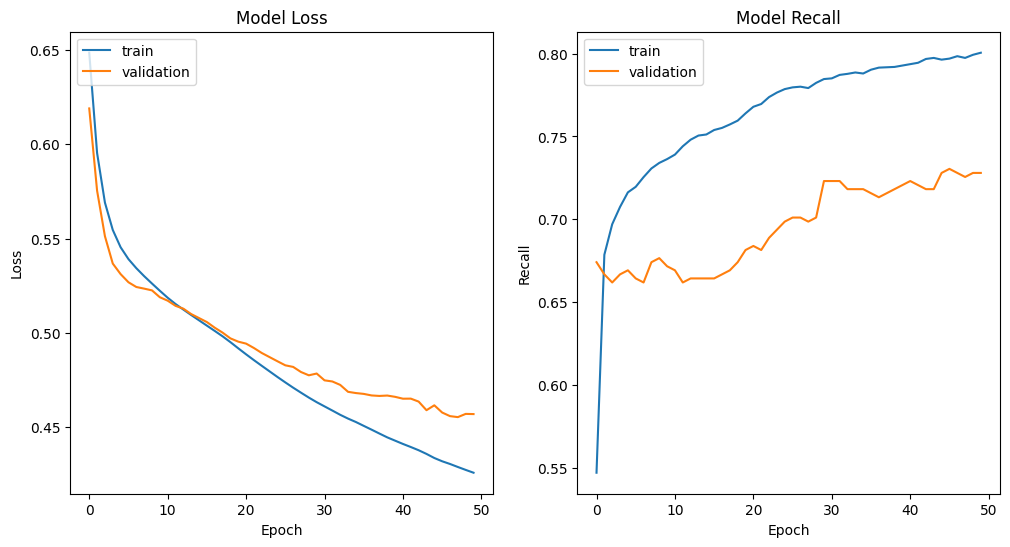

In [ ]:
# Plot model loss and model recall performance over epochs for training and validation data sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_3.history['Recall'])
plt.plot(history_3.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

**Observations - Model Loss**
* Model Loss against both training and validation dropped rapidly for the first ~5 epochs before dropping at a reduced rate.
* Model Loss values for the training and validation data sets diverged from the ~20th epoch onwards.
  * This suggests that some overfitting is beginning to occur as training progresses.
* The model achieves a Model Loss of approx. 0.42 for the training data set and 0.46 for the validation data sets by the 50th epoch.
  * This is higher than the Model Loss achieved by the initial model without oversampling applied, suggesting that oversampling is leading to an increase in Model Loss.

**Observations - Model Recall**
* Recall increased at different rates form the training and validation data sets from the first epoch onwards.
  * This suggests the model rapidly began overfitting the training data as training progressed.
* The model achieved a Recall of approx. 0.8 for the training data set and 0.71 for the validation data set by the 50th epoch, higher than any of the previous models trained so far.
  * This suggests training the model on a balanced data set leads to an improvement in model performance.

####Model 3 - Confusion Matrix

Following training, the model can be used to make predictions against the training and validation data sets.

In [ ]:
# Using the model to predict target variable for training and validation data sets
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


The model predictions can be summarized in a confusion matrix.

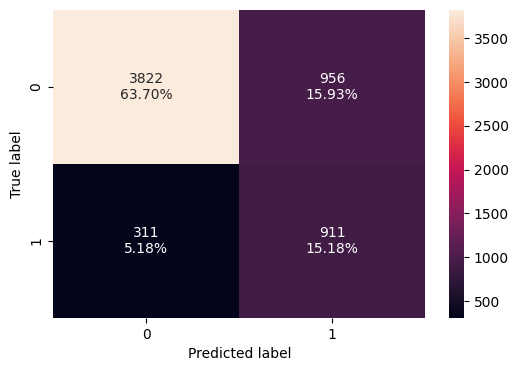

In [ ]:
# Plot confusion matrix for model performance against training data set
make_confusion_matrix(y_train, y_train_pred)

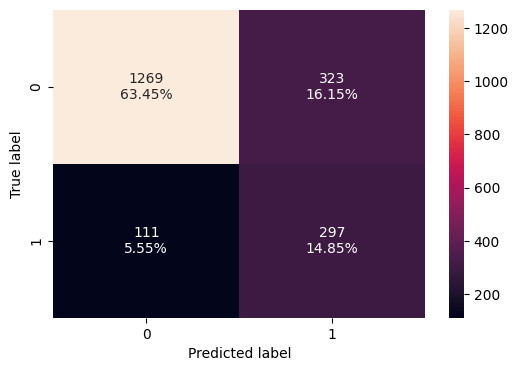

In [ ]:
# Plot confusion matrix for model performance against validation data set
make_confusion_matrix(y_val, y_val_pred)

**Observations - Confusion Matrix**
* After training the model for 50 epochs, the trained model incorrectly predicted 111 False Negatives on the validation data set, and 323 False Positives.
* The model predicted approx. 73% of the **Exited** class 1 customers correctly.  
  * This is higher than all the previous models trained so far, suggesting training the model on a balanced data set is improving model performance with respect to predicting class 1 customers.
  * However, this model has predicted the highest number of False Positives, suggesting it is not as effective as predicting class 0 customers correctly.

####Model 3 - Classification Report

The performance metrics of the trained model with regard to both class 0 and class 1 (Exited) customers in the data sets can be illustrated using a classification report.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against training data
model3_cr_train = classification_report(y_train, y_train_pred)
print(model3_cr_train)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4778
           1       0.49      0.75      0.59      1222

    accuracy                           0.79      6000
   macro avg       0.71      0.77      0.72      6000
weighted avg       0.84      0.79      0.80      6000



In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against validation data
model3_cr_val = classification_report(y_val, y_val_pred)
print(model3_cr_val)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1592
           1       0.48      0.73      0.58       408

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



**Observations - Classification Report**
* Model 3 achieved a reduced Recall of 0.8 with respect to class 0 customers on the validation data set, but an improved Recall of 0.73 with respect to class 1 customers.
  * This is higher than all the previous models trained so far, suggesting training the model on a balanced data set is improving model performance with respect to predicting class 1 customers.
  * However, this model is not as effective as predicting class 0 customers correctly.
* The similar Recall values achieved for class 0 and class 1 customers suggests the model is not biased towards either category.

####Model 3 - Observations

* Model 3 trained with a balanced data set created using **SMOTE** statistical technique has achieved the highest Recall so far in predicting class 1 customers correctly.
  * It is the first model to achieve a Recall value of >0.5 with regard to class 1 customers.
* The model does not appear to be biased towards either customer class.
* The model is less effective at correctly predicting class 0 customers than the previous, biased models.
* Using balanced data to train a model with the **Adam** learning optimizer could improve performance further.

In [ ]:
# Add details of model 3 to results dataframe and output the results
results.loc[3] = [2,[64,32,1],["relu","relu","sigmoid"],50,32,"SGD","-","SMOTE",history_3.history["loss"][-1],history_3.history["val_loss"][-1],history_3.history["Recall"][-1],history_3.history["val_Recall"][-1],round(model_3_time,2)]
results

,# hidden layers,# neurons,activation functions,# epochs,batch size,optimizer,dropout,sampling,train loss,val loss,train recall,val recall,time (secs)
0,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,-,0.383497,0.388428,0.333061,0.294118,31.53
1,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,-,0.287417,0.374106,0.572013,0.460784,34.60
2,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,0.5,-,0.337905,0.343005,0.459083,0.480392,36.16
3,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,SMOTE,0.425973,0.457045,0.800544,0.727941,53.86


### Model 4 - Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

####Model 4 - Building

Model 3 suggested that training a model with a balanced training data set leads to an improvement in Recall performance with regard to class 1 customers.

Models 1 and 2 also suggested that training a model with the **Adam** learning optimizer can lead to an improvement in performance.

Further improvement in model performance may be possible by combining training with a balanced data set and use of the **Adam** learning optimizer.

To test this, a new model will be compiled using the **Adam** learning optimizer, and then trained using the balanced data set created for Model 3 using the **SMOTE** oversampling technique.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources
backend.clear_session()

In [ ]:
# Initializing the neural network with identical parameters to the initial model
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation = 'sigmoid'))

# Output a summary of the neural network layers, displaying the number of trainable parameters available in the model
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set learning optimizer to Adam
optimizer = keras.optimizers.Adam()

# Compile the model with the selected learning optimizer and performance metrics
model_4.compile(loss="BinaryCrossentropy", optimizer=optimizer, metrics=metrics)

The compiled model with **Adam** training optimizer is then trained on the oversampled training data set, and its performance is evaluated using the validation data set.

In [ ]:
# Record model training start time
start = time.time()

# Training model_0 and validating performance
history_4 = model_4.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

#Record model training end time
end=time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6415 - loss: 0.6140 - val_Recall: 0.6936 - val_loss: 0.5373
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7438 - loss: 0.5218 - val_Recall: 0.7059 - val_loss: 0.5228
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7681 - loss: 0.4920 - val_Recall: 0.7010 - val_loss: 0.5028
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7822 - loss: 0.4668 - val_Recall: 0.7181 - val_loss: 0.4847
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7946 - loss: 0.4487 - val_Recall: 0.7132 - val_loss: 0.4718
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7983 - loss: 0.4347 - val_Recall: 0.7059 - val_loss: 0.4683
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8048 - loss: 0.4231 - val_Recall: 0.7108 - val_loss: 0.4672
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8113 - loss: 0.4128 - val_Recall: 0.7108 - val_loss: 0.4616
Epoch 9/

In [ ]:
# Output time taken to train the model
model_4_time = end - start
print("Time taken to train model:",round((end-start),2),"seconds")

Time taken to train model: 54.23 seconds


####Model 4 - Evaluation

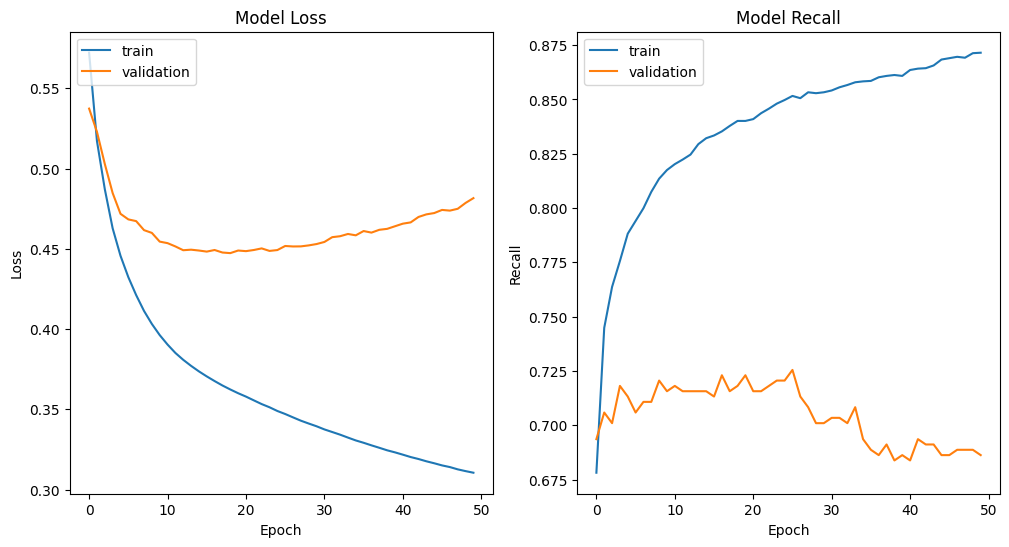

In [ ]:
# Plot model loss and model recall performance over epochs for training and validation data sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_4.history['Recall'])
plt.plot(history_4.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

**Observations - Model Loss**
* Model Loss against both training and validation dropped rapidly for the first ~5 epochs to approx 0.47 before diverging.
* Model Loss against the training data set continues to drop steeply until the 10th epoch, before dropping at a reduced rate until reaching approx. 0.31 by the 50th epoch.
* The reduction in Model Loss flattens out by the ~10th epoch against the validation data set, before beginning to increase slightly for the remaining training, reaching approx. 0.47 by the 50th epoch.
  * This is similar to the Model Loss value achieved by the previous model compiled with **SGD** on the validation data set.
* Just like in Model 1, Model 4 shows a divergence in Model Loss values between the training and validation data sets from the ~5th epoch onwards.
  * This suggests using **Adam** optimizer without **Dropout** always leads to rapid overfitting of the training data, even if a balanced data set is used.

**Observations - Model Recall**
* Recall increased rapidly for the first ~10 epochs for the training data set, before increasing at a reduced rate for the remainder of the training time, and achieved a Recall of approx. 0.87 by the 50th epoch.
* Conversely, Recall increased at an inconsistent, reduced rate for the first ~22 epochs for the validation data set, achieving a maximum of 0.725 before reducing for the remainder of the training epochs to reach approx. 0.69 by the 50th training epoch.
    * This is slightly lower than the final Recall of approx. 0.72 achieved by Model 3 trained on balanced data using the **SGD** learning optimizer.
    * This suggests Model 4 is overfitting the training data set throughout training.
    * This suggests that an extended period of training actually leads to a reduction in model performance when Model 4 is trained with balanced data using the **Adam** learning optimizer.  
* Model 4 could have achieved an improved Recall performance if training was halted once validation Recall performance began to decrease.
    * This suggests the **Adam** learning optimizer might drive the model to adapt too quickly to the training data, causing overfitting and impacting validation Recall performance.
    * Applying a reduced learning rate to the **Adam** learning optimizer could also help address this rapid overfitting.

####Model 4 - Confusion Matrix

Following training, the model can be used to make predictions against the training and validation data sets.

In [ ]:
# Using the model to predict target variable for training and validation data sets
y_train_pred = model_4.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


The model predictions can be summarized in a confusion matrix.

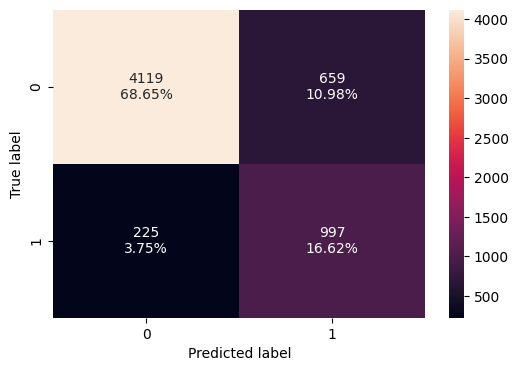

In [ ]:
# Plot confusion matrix for model performance against training data set
make_confusion_matrix(y_train, y_train_pred)

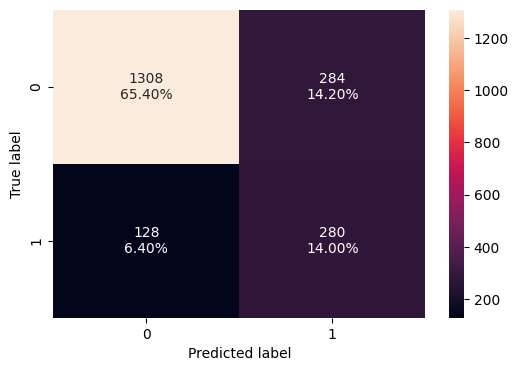

In [ ]:
# Plot confusion matrix for model performance against validation data set
make_confusion_matrix(y_val, y_val_pred)

**Observations - Confusion Matrix**
* After training the model for 50 epochs, the trained model incorrectly predicted 128 False Negatives on the validation data set, and 284 False Positives.
* The model predicted approx. 68% of the **Exited** class 1 customers correctly.  
  * This is lower than the previous model trained on balanced data using **SGD** learning optimizer.

####Model 4 - Classification Report

The performance metrics of the trained model with regard to both class 0 and class 1 (Exited) customers in the data sets can be illustrated using a classification report.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against training data
model4_cr_train = classification_report(y_train, y_train_pred)
print(model4_cr_train)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      4778
           1       0.60      0.82      0.69      1222

    accuracy                           0.85      6000
   macro avg       0.78      0.84      0.80      6000
weighted avg       0.88      0.85      0.86      6000



In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against validation data
model4_cr_val = classification_report(y_val, y_val_pred)
print(model4_cr_val)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1592
           1       0.50      0.69      0.58       408

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.83      0.79      0.81      2000



**Observations - Classification Report**
* Model 4 achieved a slightly improved Recall of 0.82 with respect to class 0 customers on the validation data set, but a slightly reduced Recall of 0.69 with regard to class 1 customers.
  * This suggests there is limited difference in performance between compiling a model with **SGD** learning optimizer or **Adam** learning optimizer and training it for 50 epochs on a balanced data set.

####Model 4 - Observations

* Model 4 compiled with the **Adam** learning optimizer and trained with a balanced data set achieved similar levels of Recall to the previous Model 3 trained on balanced data and using the **SGD** learning optimizer.
* Like Model 1, Model 4 demonstrated overfitting on the training data.
* The Recall performance of the model on the validation data set actually began to reduce as training progressed, suggesting the **Adam** learning optimizer is adapting to the training data too rapidly.
* The model does not appear to be biased towards either customer class.
* Applying **Dropout** to the model could help reduce the rate of adaption by the model compiled **Adam** learning optimizer, and improve model performance further.

In [ ]:
# Add details of model 4 to results dataframe and output the results
results.loc[4] = [2,[64,32,1],["relu","relu","sigmoid"],50,32,"Adam","-","SMOTE",history_4.history["loss"][-1],history_4.history["val_loss"][-1],history_4.history["Recall"][-1],history_4.history["val_Recall"][-1],round(model_4_time,2)]
results

,# hidden layers,# neurons,activation functions,# epochs,batch size,optimizer,dropout,sampling,train loss,val loss,train recall,val recall,time (secs)
0,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,-,0.383497,0.388428,0.333061,0.294118,31.53
1,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,-,0.287417,0.374106,0.572013,0.460784,34.60
2,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,0.5,-,0.337905,0.343005,0.459083,0.480392,36.16
3,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,SMOTE,0.425973,0.457045,0.800544,0.727941,53.86
4,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,SMOTE,0.310529,0.481553,0.871494,0.686275,54.23


### Model 5 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

####Model 5 - Building

Just like Model 1, Model 4 compiled with the **Adam** learning optimizer rapidly overfit the balanced training data. The Recall peformance of Model 4 on the validation data set also degraded as training progressed.

This may be due to the speed with which the **Adam** learning optimizer adapted the model to the training data.

This overfitting can be addressed be reintroducing **Dropout** to the neural network architecture.

To test this, a new model will be built with **Dropout** applied to the first hidden layer of the neural network, the **Adam** learning optimizer applied, and training performed on the balanced data set created using the **SMOTE** technique.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources
backend.clear_session()

In [ ]:
# Initializing the neural network
model_5 = Sequential()
model_5.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a dropout layer, which will randomly drop half the neurons in each training iteration
model_5.add(Dropout(0.5))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

# Output a summary of the neural network layers, displaying the number of trainable parameters available in the model
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set learning optimizer to Adam
optimizer = keras.optimizers.Adam()

# Compile the model with the selected learning optimizer and performance metrics
model_5.compile(loss="BinaryCrossentropy", optimizer=optimizer, metrics=metrics)

The compiled model with **Dropout** and **Adam** training optimizer applied is then trained on the oversampled training data set, and its performance is evaluated using the validation data set.

In [ ]:
# Record model training start time
start = time.time()

# Training model_0 and validating performance
history_5 = model_5.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)

#Record model training end time
end=time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6074 - loss: 0.6795 - val_Recall: 0.7230 - val_loss: 0.5934
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7016 - loss: 0.5656 - val_Recall: 0.7377 - val_loss: 0.5914
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7162 - loss: 0.5463 - val_Recall: 0.7230 - val_loss: 0.5684
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7344 - loss: 0.5290 - val_Recall: 0.7598 - val_loss: 0.5841
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Recall: 0.7470 - loss: 0.5238 - val_Recall: 0.7647 - val_loss: 0.5844
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7491 - loss: 0.5102 - val_Recall: 0.7475 - val_loss: 0.5421
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7395 - loss: 0.5083 - val_Recall: 0.7696 - val_loss: 0.5517
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7616 - loss: 0.4999 - val_Recall: 0.7647 - val_loss: 0.5429
Epoch 9/

In [ ]:
# Output time taken to train the model
model_5_time = end - start
print("Time taken to train model:",round((end-start),2),"seconds")

Time taken to train model: 58.36 seconds


####Model 5 - Evaluation

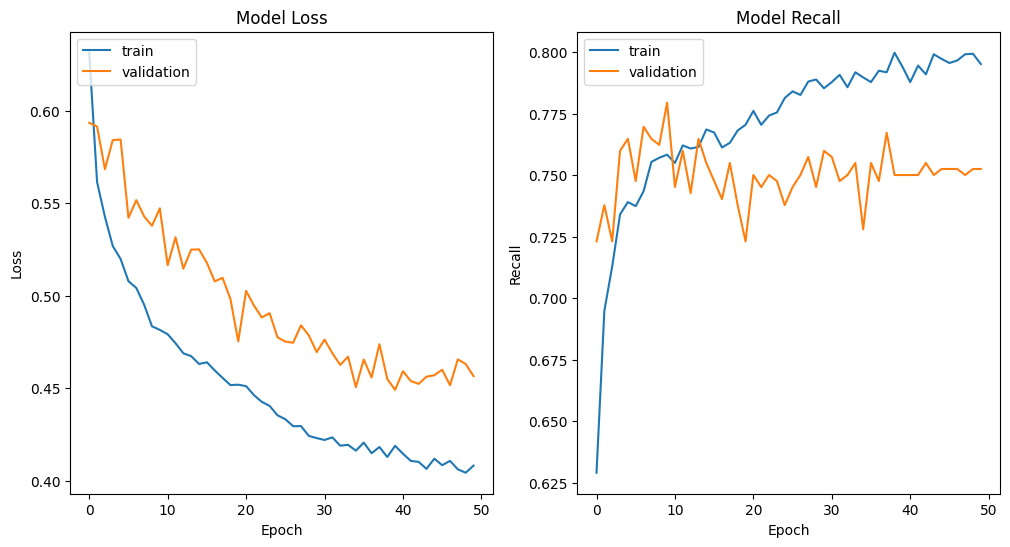

In [ ]:
# Plot model loss and model recall performance over epochs for training and validation data sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_5.history['Recall'])
plt.plot(history_5.history['val_Recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

**Observations - Model Loss**
* Model Loss reduced for the training data set more rapidly than for the validation data set.
  * This suggests that some overfitting is still occurring, but the difference in Model Loss between training and validation data sets is smaller than Model 4.
* Model Loss against the training data set continues to drop steeply until the 10th epoch, before dropping at a reduced rate until reaching approx. 0.415 by the 50th epoch.
* Model Loss decreases at a reduced, inconsistent rate for the validation data set, reaching approx. 0.47 by the 50th epoch.
  * This is similar to the Model Loss value achieved by the previous Model 4 for the validation data set where **Dropout** was not applied.  

**Observations - Model Recall**
* Recall increased at a similar rate for both training and validation data sets for the first ~10 training epochs before beginning to diverge, suggesting that some overfitting is still occurring.
* The model achieved a Recall of approx. 0.795 for the training data set, and 0.75 for the validation data set.
  * This suggests applying **Dropout** is preventing model validation performance from degrading as training proceeds.
* The rate of increase in Recall is not smooth, with drops in Recall observed at different epochs for the training and validation data sets.
  * This could be caused the random **Dropout** of critical neurons on specific training iterations leading to a reduction in Recall for that iteration.

####Model 5 - Confusion Matrix

Following training, the model can be used to make predictions against the training and validation data sets.

In [ ]:
# Using the model to predict target variable for training and validation data sets
y_train_pred = model_5.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


The model predictions can be summarized in a confusion matrix.

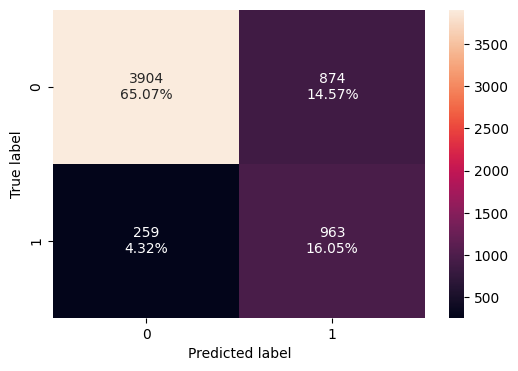

In [ ]:
# Plot confusion matrix for model performance against training data set
make_confusion_matrix(y_train, y_train_pred)

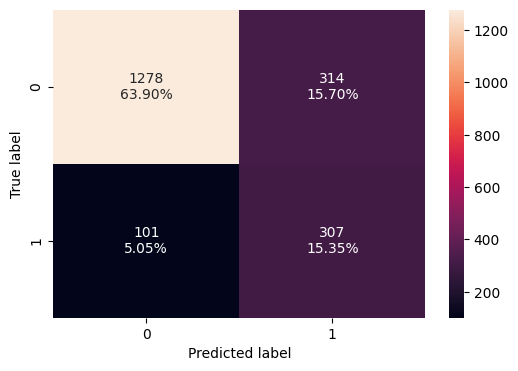

In [ ]:
# Plot confusion matrix for model performance against validation data set
make_confusion_matrix(y_val, y_val_pred)

**Observations - Confusion Matrix**
* After training the model for 50 epochs, the trained model incorrectly predicted 101 False Negatives on the validation data set, and 314 False Positives.
* The model predicted approx. 75% of the **Exited** class 1 customers correctly.  
  * This is higher than the previous model trained on balanced data with **Adam** learning optimizer where **Dropout** was not applied.
  * However, this model has predicted a higher number of False Positives than the previous model, suggesting it is not as effective as predicting class 0 customers correctly.

####Model 5 - Classification Report

The performance metrics of the trained model with regard to both class 0 and class 1 (Exited) customers in the data sets can be illustrated using a classification report.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against training data
model5_cr_train = classification_report(y_train, y_train_pred)
print(model5_cr_train)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4778
           1       0.52      0.79      0.63      1222

    accuracy                           0.81      6000
   macro avg       0.73      0.80      0.75      6000
weighted avg       0.85      0.81      0.82      6000



In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against validation data
model5_cr_val = classification_report(y_val, y_val_pred)
print(model5_cr_val)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1592
           1       0.49      0.75      0.60       408

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



**Observations - Classification Report**
* Model 5 achieved a slightly reduced Recall of 0.80 with respect to class 0 customers on the validation data set, and an improved Recall of 0.75 with regard to class 1 customers.
  * This suggests that applying **Dropout** leads to an improvement in model performance when the **Adam** learning optimizer is used, both for unbalanced and balanced training data sets.

####Model 5 - Observations

* Model 5 compiled with the **Adam** learning optimizer with **Dropout** and trained with a balanced data set achieved the highest Recall performance of all the models trained.
* Model 5 demonstrated less overfitting than Model 4 and improved performance, suggesting **Dropout** is an important factor to consider when using the **Adam** learning optimizer.
* The model does not appear to be biased towards either customer class.

In [ ]:
# Add details of model 5 to results dataframe
results.loc[5] = [2,[64,32,1],["relu","relu","sigmoid"],50,32,"Adam","0.5","SMOTE",history_5.history["loss"][-1],history_5.history["val_loss"][-1],history_5.history["Recall"][-1],history_5.history["val_Recall"][-1],round(model_5_time,2)]

## Model Performance Comparison and Final Model Selection

###Model Comparison

A total of 6 models have been built, with different learning optimizers, **Dropout** strategies and sampling approaches applied.

In [ ]:
# Display a summary of all 6 models
results

,# hidden layers,# neurons,activation functions,# epochs,batch size,optimizer,dropout,sampling,train loss,val loss,train recall,val recall,time (secs)
0,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,-,0.383497,0.388428,0.333061,0.294118,31.53
1,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,-,0.287417,0.374106,0.572013,0.460784,34.60
2,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,0.5,-,0.337905,0.343005,0.459083,0.480392,36.16
3,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,SGD,-,SMOTE,0.425973,0.457045,0.800544,0.727941,53.86
4,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,-,SMOTE,0.310529,0.481553,0.871494,0.686275,54.23
5,2,"[64, 32, 1]","[relu, relu, sigmoid]",50,32,Adam,0.5,SMOTE,0.408268,0.456600,0.795103,0.752451,58.36


**Observations**
* It appears that balancing the testing data using the **SMOTE** oversampling technique is important for achieving a validation Recall score of >0.5 with respect to class 1 customers, and addressing model bias for the majority class 0 customers.
* Models compiled with the **Adam** learning optimizer performed better when **Dropout** was applied to address overfitting.
  * This improvement in performance was greater when the model was trained on a balanced data set.
* Model 3 compiled with the **SGD** learning optimizer and trained on balanced data slightly outperformed Model 4 compiled with the **Adam** learning optimizer.
* Model 5 compiled with the **Adam** learning optimizer with **Dropout** applied and trained on a balanced training data set provided the best validation Recall performance with respect to class 1 customers of approx. 0.75.

**Final model selection**

Based on the fact it achieved the highest validation Recall score, did not show bias towards a customer class, and showed reasonable performance on all other performance metrics, **Model 5 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout** will be selected for testing.

###Final model testing

The final selected model can now be tested against the reserve test data set.

This test data set has not been used previously, to ensure there is no data leakage when performing training or hyperparameter tuning of any of the models.

In [ ]:
# Using the model to predict target variable for the reserve test data set
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


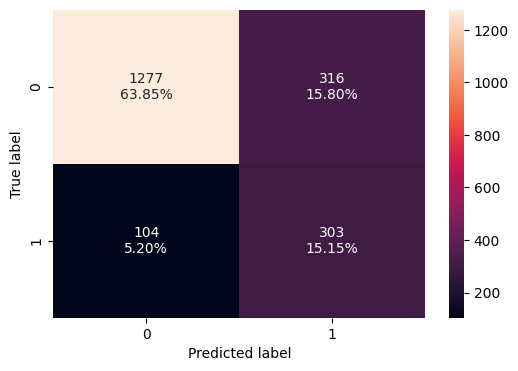

In [ ]:
# Plot confusion matrix for model performance against the test data set
make_confusion_matrix(y_test, y_test_pred)

**Observations - Confusion Matrix**
* Model 5 incorrectly predicted 104 False Negatives on the test data set, and 316 False Positives.
* The model predicted approx. 75% of the **Exited** class 1 customers correctly.  
  * This is similar to the performance observed for Model 5 on the validation data set.

In [ ]:
# Classification report demonstrating model performance metrics for all customer classes against test data
model5_cr_test = classification_report(y_test, y_test_pred)
print(model5_cr_test)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



**Observations - Classification Report**
* Model 5 achieved a Recall of 0.80 with respect to class 0 customers on the test data set, and a Recall of 0.74 with regard to class 1 customers.
  * These scores are similar to those achieved by the model on the validation data set, suggesting this is a generalized model that will function to a similar level of performance on future unseen data sets.
* Model 5 achieved a weighted average F1 Score of 0.8, demonstrating good performance in predicting both classes of customer.
* Performance of the model could be improved further through fine tuning other model parameters, including:
  * Adding additional hidden layers to the neural network architecture.
  * Altering the number of neurons in each hidden layer of the neural network.
  * Trying alternative activation functions such as **tanh** on neurons in the neural network.
  * Altering the **Dropout** rate and adding additional **Dropout** layers to the neural network architecture.
  * Adding **Batch Normalization** layers to the neural network architecture.
  * Amending the learning rate of the **Adam** learning optimizer.
  * Initializing weights in the neural network using methods such as **Xavier** or **He**.
  * Altering the **Batch Size** of each training iteration.
  * Amending the number of **Epochs** the model is trained for.

## Actionable Insights and Business Recommendations

* Management at the bank can deploy the final model to predict with a reasonable degree of confidence whether a customer is likely to leave the bank within the next 6 months, and target those customers with tailored offers to incentivize remaining with the bank.

* From the EDA, it appears that older customers and customers with larger account balances are at higher risk of leaving the bank. These customers could be quite lucrative for the bank, so further investigation should be performed on the reasons why these customers go on to leave the bank.

* The bank also appears to have an issue with customer retention in the Germany region specifically, suggesting increased competition within this region that needs to be addressed.

* Customers who use 3 or more products with the bank are more likely to go on to leave the bank. These customers may be looking for more sophisticated services, and could be very lucrative customers for the bank if retained.

* The number of customers with less than 1 year of **Tenure** is roughly half the number of customers acquired in previous years, suggesting the bank has encountered difficulties in acquiring new customers in the past year. This could be addressed by some sort of incentive encouraging new customers to open products with the bank.

* There are a large proportion of customers with zero or close to zero account balances. These may be customers who are inactive and do not use their accounts with the bank.

* The bank should consider employing oversampling techniques such as SMOTE when performing analysis of customer churn going forward. Using a balanced dataset is an important factor for model training to avoid biased predictions.



In [ ]:
#Final code to convert this.ipynb file to html for course submission
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Study_Materials/PGP-AIML/04.Neural_Networks/Project4_Bank_Churn_Neural_Networks/DB_submission_Project4_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Study_Materials/PGP-AIML/04.Neural_Networks/Project4_Bank_Churn_Neural_Networks/DB_submission_Project4_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2565361 bytes to /content/drive/MyDrive/Study_Materials/PGP-AIML/04.Neural_Networks/Project4_Bank_Churn_Neural_Networks/DB_submission_Project4_LearnerNotebook_FullCode.html
